In [1]:
import warnings
warnings.filterwarnings('ignore')
from src.data.datasets import *
from src.scripts import description, notation_system, sentiment_analysis, experts_selection, language_detection, topic_detection_naive, topic_detection_lda, clustering
%load_ext autoreload
%autoreload 2

In [2]:
DATA_FOLDER = "data/"
GENERATED_FOLDER = "generated/"
ba_dataset = BeerAdvocateDataset(data_folder=DATA_FOLDER, generated_folder=GENERATED_FOLDER, from_raw=True)
rb_dataset = RateBeerDataset(data_folder=DATA_FOLDER, generated_folder=GENERATED_FOLDER, from_raw=True)

In [3]:
data_ba = ba_dataset.get_data()
data_rb = rb_dataset.get_data()

# Description

## General description of both datasets

This is an overview of our our two already prepocessed datasets new_ba_reviews and and new_rb_reviews (preprocessed from reviews.txt). These two datasets are the basis of the rest of our project. These are the columns of the dataset :

| Column Name       | Description                                   | 
|-------------------|-----------------------------------------------|
| beer_name           | name of the beer                             |
| beer_id        | id of the beer.                             |
| brewery_name       | name of brewery of the beer.                    | 
| brewery_id      | id of the brewery.                          | 
| style             | style of the beer.                            | 
| abv       | Alcohol percentage of the beer         | 
| date      | date of the review        | 
| user_name             |        name of the user (who published the review)                     | 
| user_id |  id of user      |
| appearance |  rating gived to appearance       |
| aroma |  rating gived to aroma       |
| palate |  rating gived to palate       |
| taste |  rating gived to taste       |
| overall |  rating gived to overall       |
| rating | "mean" calculated by the website       |
| text|  review      | 

In the first part we will analyze the rating system and then we will mainly focus on the users and their according review.

In [4]:
description.reviews_caracteristics(data_ba["reviews"], "BeerAdvocate")

Basic descriptive analysis BeerAdvocate : 
Number of unique users: 60974
Number of reviews: 2501212
Number of unique beer styles: 104
Number of breweries: 11638


In [5]:
description.reviews_caracteristics(data_rb["reviews"], "RateBeer")

Basic descriptive analysis RateBeer : 
Number of unique users: 70070
Number of reviews: 7118976
Number of unique beer styles: 93
Number of breweries: 21816


An interesting thing can already be seen here. The number of users on each platforms are close but we can see that the number of reviews are 3 times higher on Ratebeer. This indicates that users on RateBeer are far more active in contributing reviews compared to those on BeerAdvocate.

# Notation System

In [ ]:
fig1, fig2 = notation_system.fig_notation_system(data_ba["reviews"], data_rb["reviews"])

### The Importance of the Rating System in Interpreting Beer Ratings

The rating system is essential for understanding the scores given to a beer. Notably, the same overall rating on BeerAdvocate and RateBeer does not reflect identical scores across different topics. In theory, if a user provides the same scores and descriptions for a beer on both platforms, the final rating would still differ between the two sites.

The topics considered in these ratings are as follows: **"appearance," "aroma," "palate," "taste," and "overall."** Concretely, the final rating is a weighted average of these topics' ratings. Our objective is to determine these weights.

This relationship can be analyzed through a **linear regression (without intercept)**. Formally, we aim to find the coefficients $(\beta_1, \beta_2, \beta_3, \beta_4, \beta_5)$ such that:

$
\text{rating} = \beta_1 \cdot \text{appearance} + \beta_2 \cdot \text{aroma} + \beta_3 \cdot \text{palate} + \beta_4 \cdot \text{taste} + \beta_5 \cdot \text{overall}
$

### Normalization

It is crucial to **normalize** the topic scores so that all values fall between 0 and 1. (On BeerAdvocate, the scores are out of 5, whereas on RateBeer, the scores are either out of 5 or out of 20). 

### Results

We find the following $\beta\$ parameters for the topics:

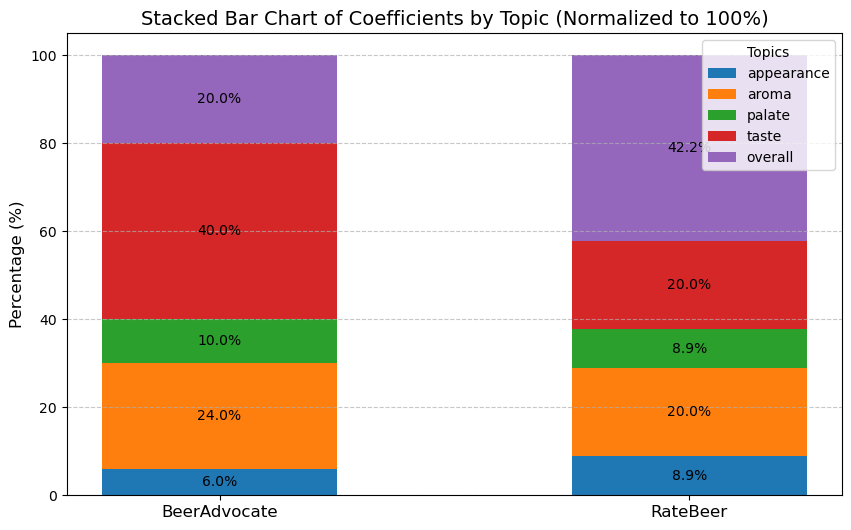

In [7]:
fig1

### Analysis of BeerAdvocate and RateBeer Notation System

BeerAdvocate and RateBeer assign similar weights to **appearance**, **aroma**, and **palate** (approximately 6%-9%, 20%-24%, and 10%, respectively). These criteria contribute comparably to the overall rating on both platforms.

However, significant differences emerge for **taste** and **overall**:  
- BeerAdvocate gives much greater weight to **taste** (40%) compared to RateBeer (20%), indicating that the perception of taste is crucial for high ratings on BeerAdvocate.  
- Conversely, RateBeer assigns double the weight to **overall** (42%) than BeerAdvocate (20%), emphasizing a more general, holistic evaluation.

### Implications:  
- **BeerAdvocate** prioritizes sensory aspects like **taste**, making it key for achieving high ratings.  
- **RateBeer** takes a broader approach, with the **overall** impression being the most critical factor.

This distinction helps explain why the same beer may receive different scores across the two platforms, even with similar topic-level ratings.


The linear regressions yield an \(R^2\) of **1.00** for both platforms. This indicates that the ratings across the five topics explain **100%** of the overall rating. Below are the predicted ratings compared to the real ratings:


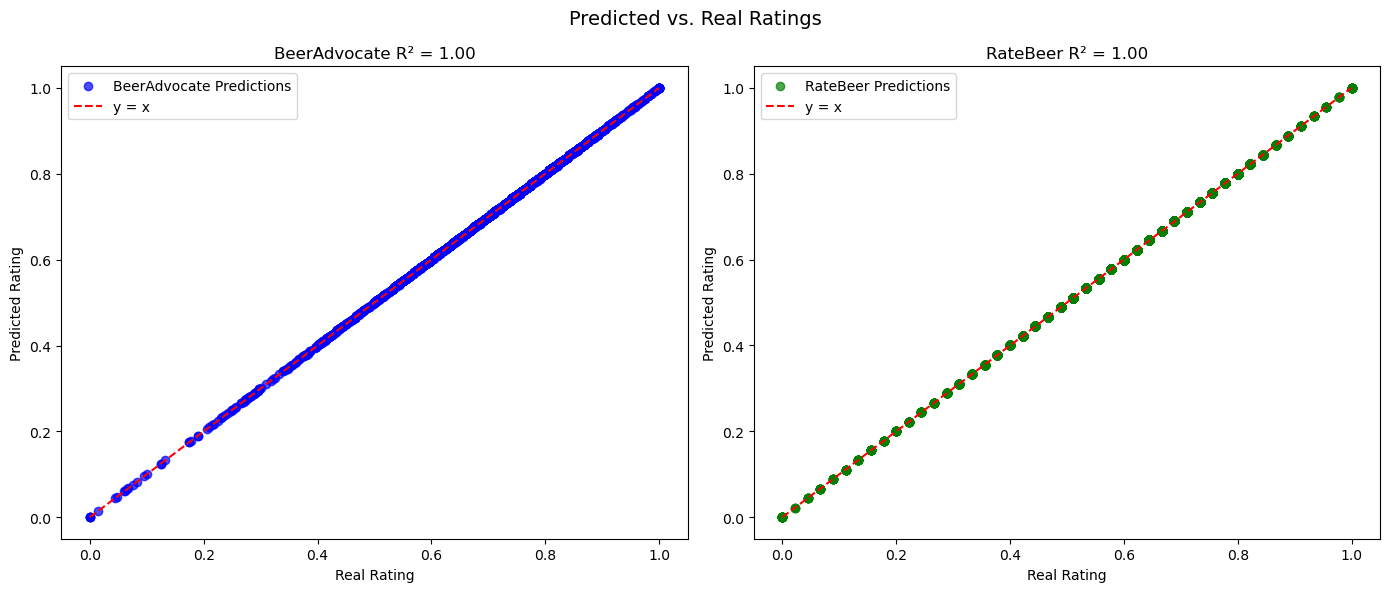

In [8]:
fig2

### Conclusion

The results of the linear regression confirm the validity of the topic weightings found for both BeerAdvocate and RateBeer. With an \(R^2\) of **1.00** for both platforms, it is evident that the five topics (**appearance**, **aroma**, **palate**, **taste**, and **overall**) fully determine the final rating. The coefficients reflect the relative importance of each topic, highlighting the key differences between the platforms: BeerAdvocate prioritizes **taste**, while RateBeer emphasizes the **overall** impression. These findings provide a clear understanding of how each platform evaluates beer ratings and the factors that influence their scoring systems.


# Experts Selection 

## User and Review Distribution on BeerAdvocate and RateBeer
We now want to focus on experts users. By shining a spotlight on these top contributors, we’re laying the groundwork for a deeper dive later on, where we’ll analyze their reviews in detail. Understanding who these experts are is key to unlocking the true strengths of BeerAdvocate and RateBeer, giving us a richer, clearer picture of each platform’s review quality and the community behind the ratings. But how can the experienced users in each platform be described ? Have they written many reviews ? Are they active ? For this, we used two different methods: one with a threshold and the other with K-means clustering.



## Methodology 1 - Threshold method
Users were categorized into four groups based on their review activity: **Experts**, **Intermediate**, **Novices**, and **Debutants**.  

- **Experts** were identified as the smallest group of users responsible for at least **50%** of the total reviews. This was done by sorting users by their review counts and iteratively summing their contributions until the threshold was met.  
- The remaining users were divided into **Intermediate** (top 10%), **Novices** (next 40%), and **Debutants** (bottom 50%) based on their proportion of total reviews and user counts.  

This classification highlights the disparity in review contributions across different user groups.

In [9]:
fig = experts_selection.fig_experts_selection(data_ba["reviews"], data_rb["reviews"])

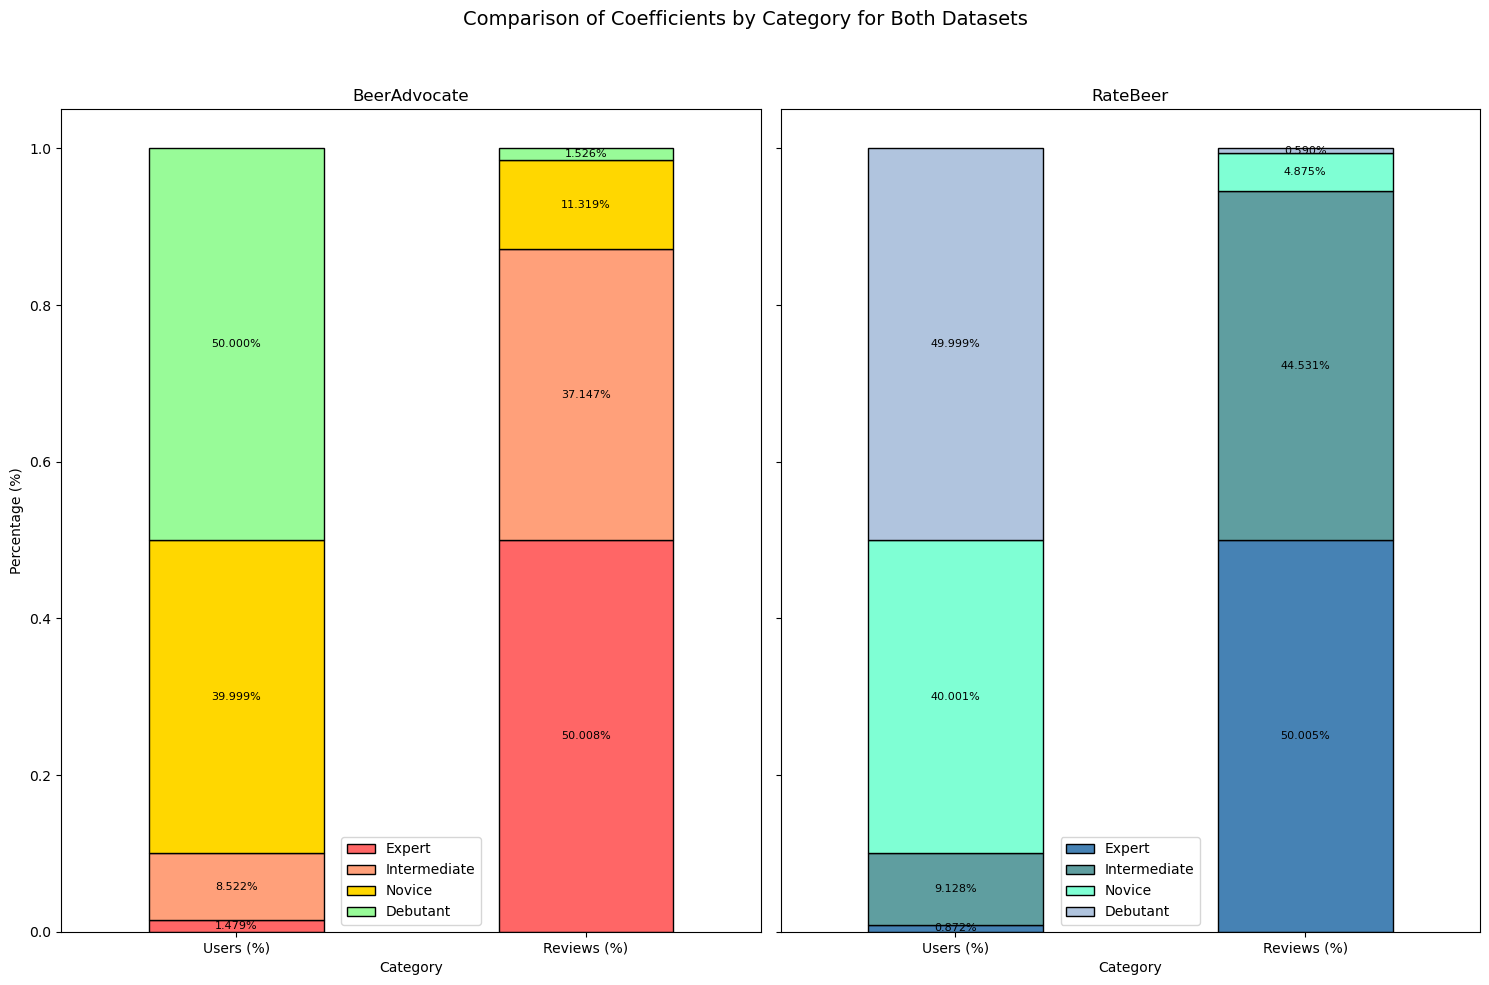

In [10]:
fig

### Results
#### BeerAdvocate
- **Experts**: 1.48% of users, 50.01% of reviews  
- **Intermediate**: 8.52% of users, 37.15% of reviews  
- **Novices**: 40.00% of users, 11.32% of reviews  
- **Debutants**: 50.00% of users, 1.53% of reviews  

#### RateBeer
- **Experts**: 0.87% of users, 50.00% of reviews  
- **Intermediate**: 9.13% of users, 44.53% of reviews  
- **Novices**: 40.00% of users, 4.87% of reviews  
- **Debutants**: 50.00% of users, 0.59% of reviews  

### Conclusion
1. A small fraction of users (**Experts**) contribute disproportionately, generating around **50%** of reviews.  
2. The majority of users (**Novices** and **Debutants**) contribute minimally despite representing over **90%** of the user base.  
3. RateBeer shows a higher concentration of activity among **Intermediate** users compared to BeerAdvocate.


## Methodology 2 - Kmeans Clustering 

In [ ]:
figs, ba_clust_summary, rb_clust_summary = clustering.clustering_fig(
    data_ba["reviews"], 
    data_rb["reviews"],
    data_ba["experts"], 
    data_rb["experts"],  
    data_ba["users"], 
    data_rb["users"], 
    "BeerAdvocate",
    "RateBeer",
)

Now we add other criteria. For each platform, we want to examine whether groups forms based on users' "experience". First, we need to define what differenciates an experienced reviewer from a beginner. For example, a user with 50 reviews is likely more experienced than someone who has written only 3-4 reviews in total. However, we can incorporate additional parameters to better define "experience". Some examples : 
- Regularity of activity : An experienced reviewer should be active, and thus have a low average spacing time between reviews.
- Diveristy in beer styles : A user with 50 reviews but who has explored only 2 different beer styles might be considered less experienced than someone with 30 reviews covering 10 different styles.
- Deviation in ratings : A user with 100 reviews who consistently rates beers at the minimum or maximum score may not be an ideal reviewer.

And the list goes on...




**User information**

Before getting into the part of clustering, we need to extract some useful information about each user that could also be used as features :
- total number of reviews
- active period
- average daily reviews
- time spacing between the reviews
- style diversity

### Features Definition

The following features are used to analyze user behavior and hence identify experts in each datasets:

1. **total_reviews**:
   - *Definition*: The total number of reviews submitted by the user.
   - *Purpose*: Captures the level of activity or engagement of a user on the platform.
   - *Weaknesses*: This feature only accounts the user's experience on the platform. It does not measure if the user have previous experience of beer ratings. Additionally, it does not access the quality of the reviews, nor the temporal aspect.

2. **mean_time_spacing**:
   - *Definition*: The average time (in days) between two consecutive reviews by the user.
   - *Purpose*: Indicates how regularly the user submits reviews. Lower values suggest more frequent activity, adding a temporal dimension to the grouping.
   - *Weaknesses*: This feature may be biased for users with a short active period. It also results in NaN values for users with less than 2 reviews.

3. **std_time_spacing**:
   - *Definition*: The standard deviation of the time (in days) between consecutive reviews.
   - *Purpose*: Measures the consistency of the user's review frequency. Lower values suggest more regular intervals between reviews, while higher values indicate variability.
   - *Weaknesses*: Similar to the previous feature, this feature results in NaN values for users with fewer than 3 reviews.

4. **style_diversity**:
   - *Definition*: The total number of different beer styles rated by the user.
   - *Purpose*: Captures the diversity of a user in terms of beer style in addition to its activity.
   - *Weaknesses*: A high ratio of diversity relative to total reviews may indicate excessive versatility, potentially unbalancing ratings. On the other side, a very low ratio might reflect a user's specialization in specific beer types. 


These features help characterize user activity and behavior over time, enabling clustering or deeper analysis of user patterns. They were selected empirically by testing the relevance of various feature sets. 

#### Data Transformation

Since the distributions of these features are exponential, transformations are necessary to approximate normal distributions and ensure proper normalization. We tried 2 different methods :
- QuantileTransformer : A build-in function from sklearn that transforms the distributions into a specific form.
- Logarithmic transformation : A simple method to attenuate very high values. A small constant is added to avoid undefined values (due to log(0))

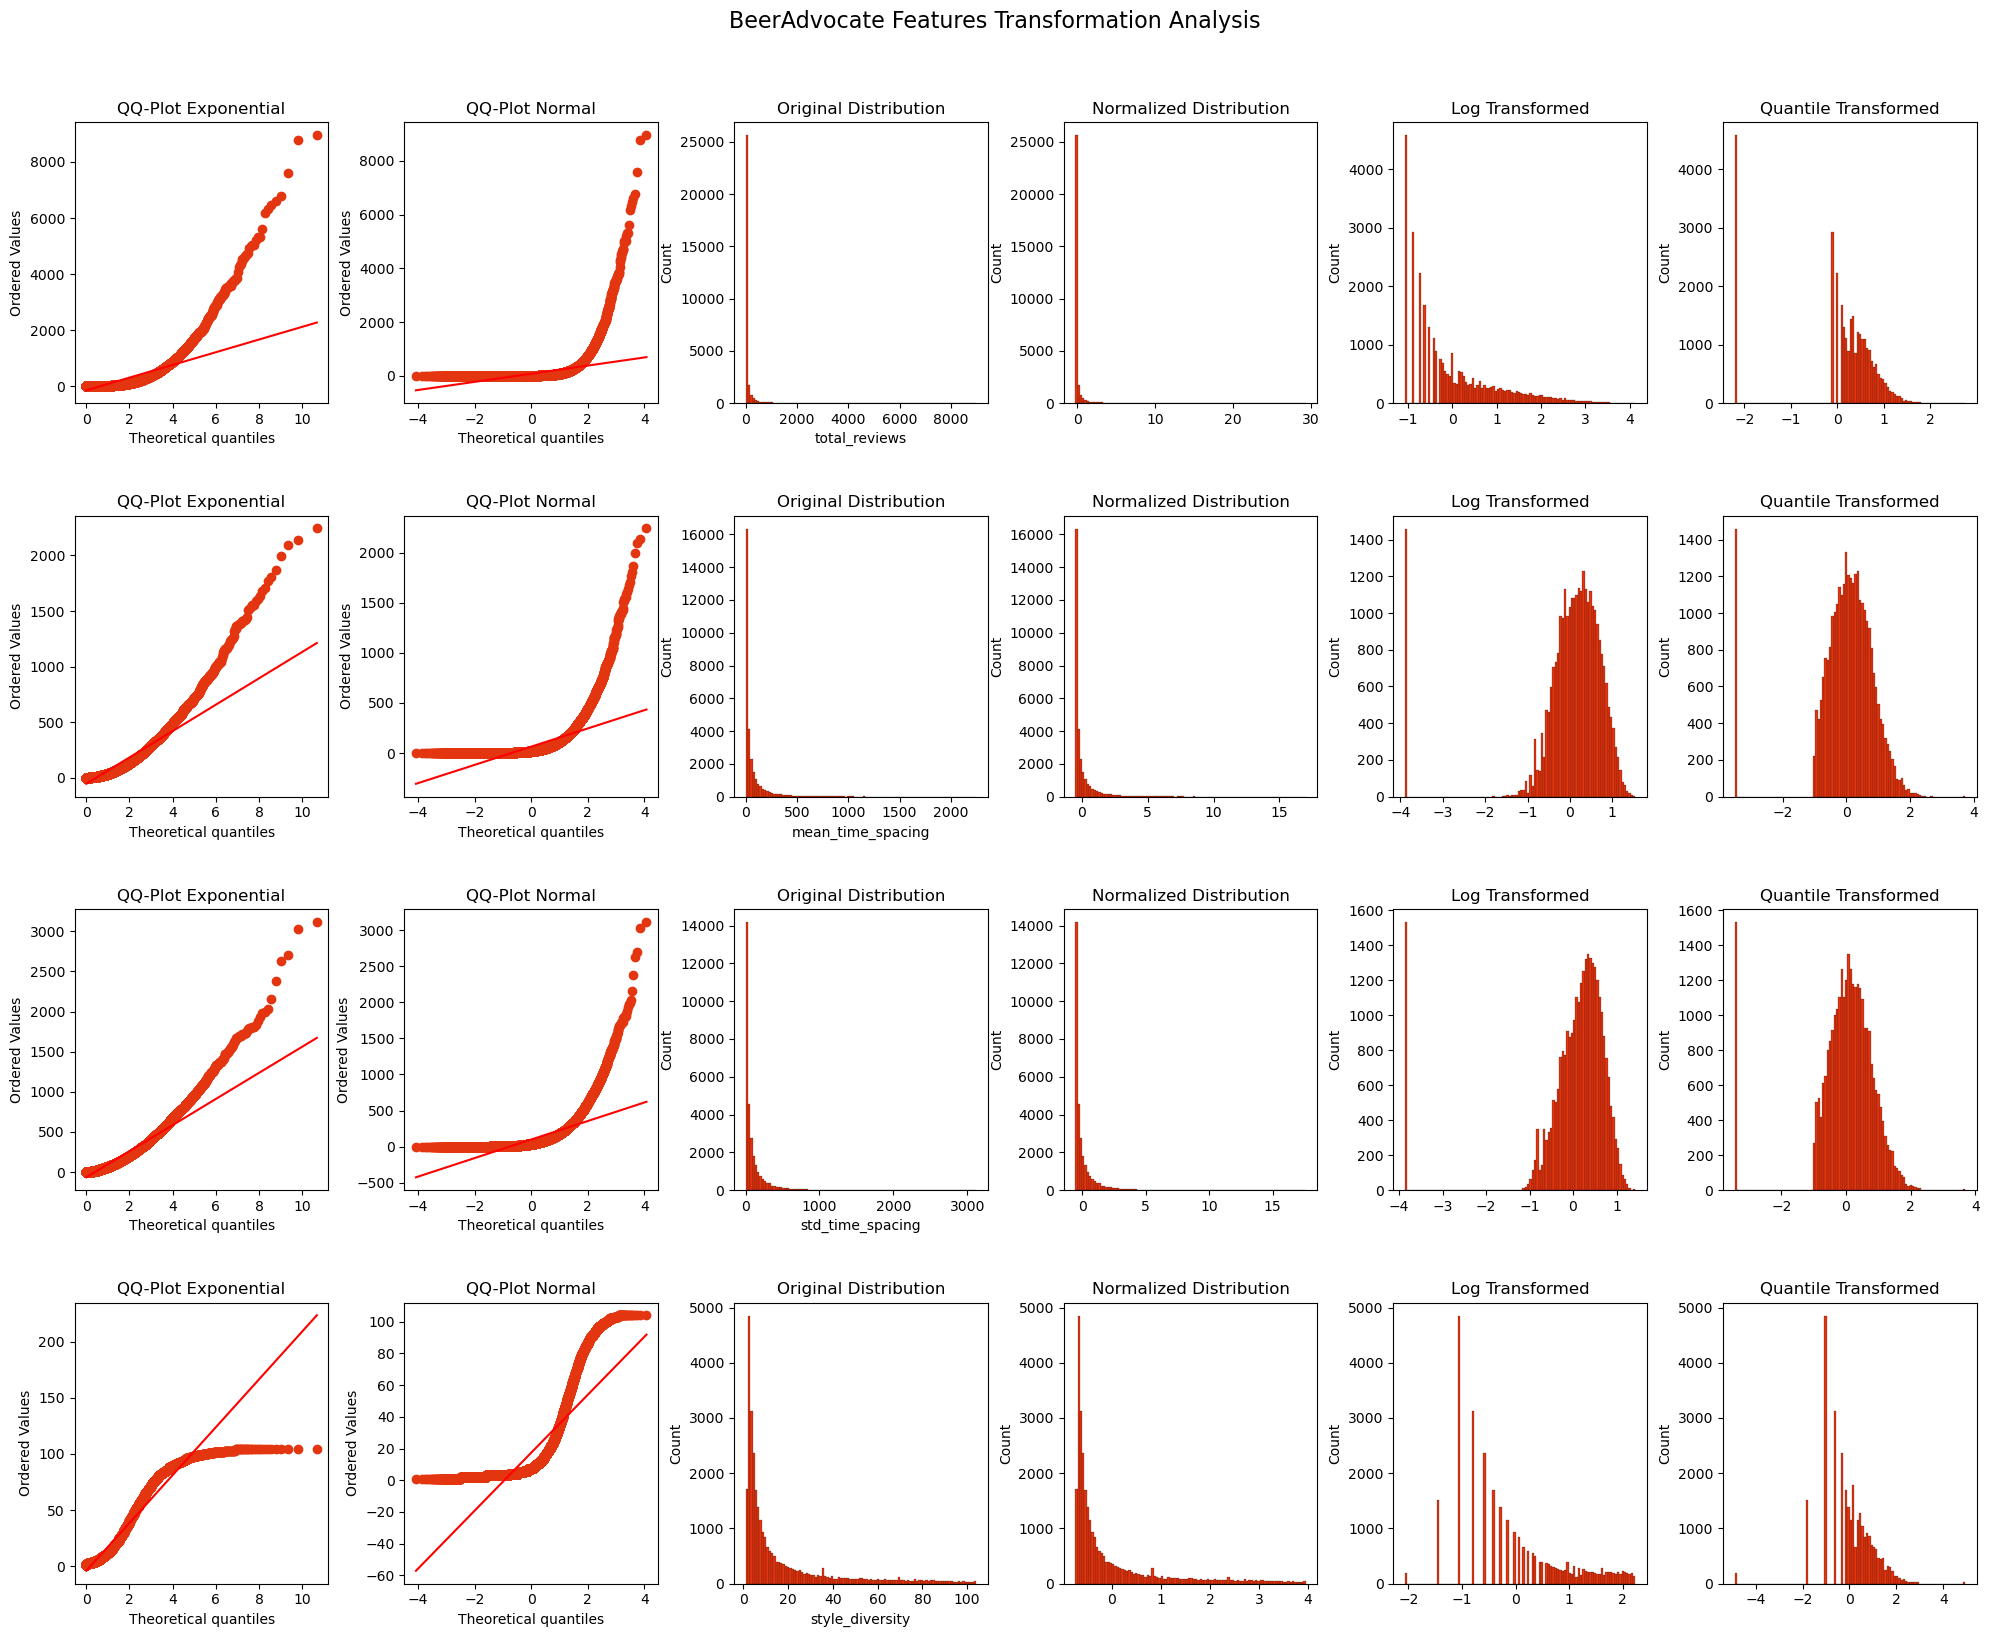

In [13]:
figs[0]

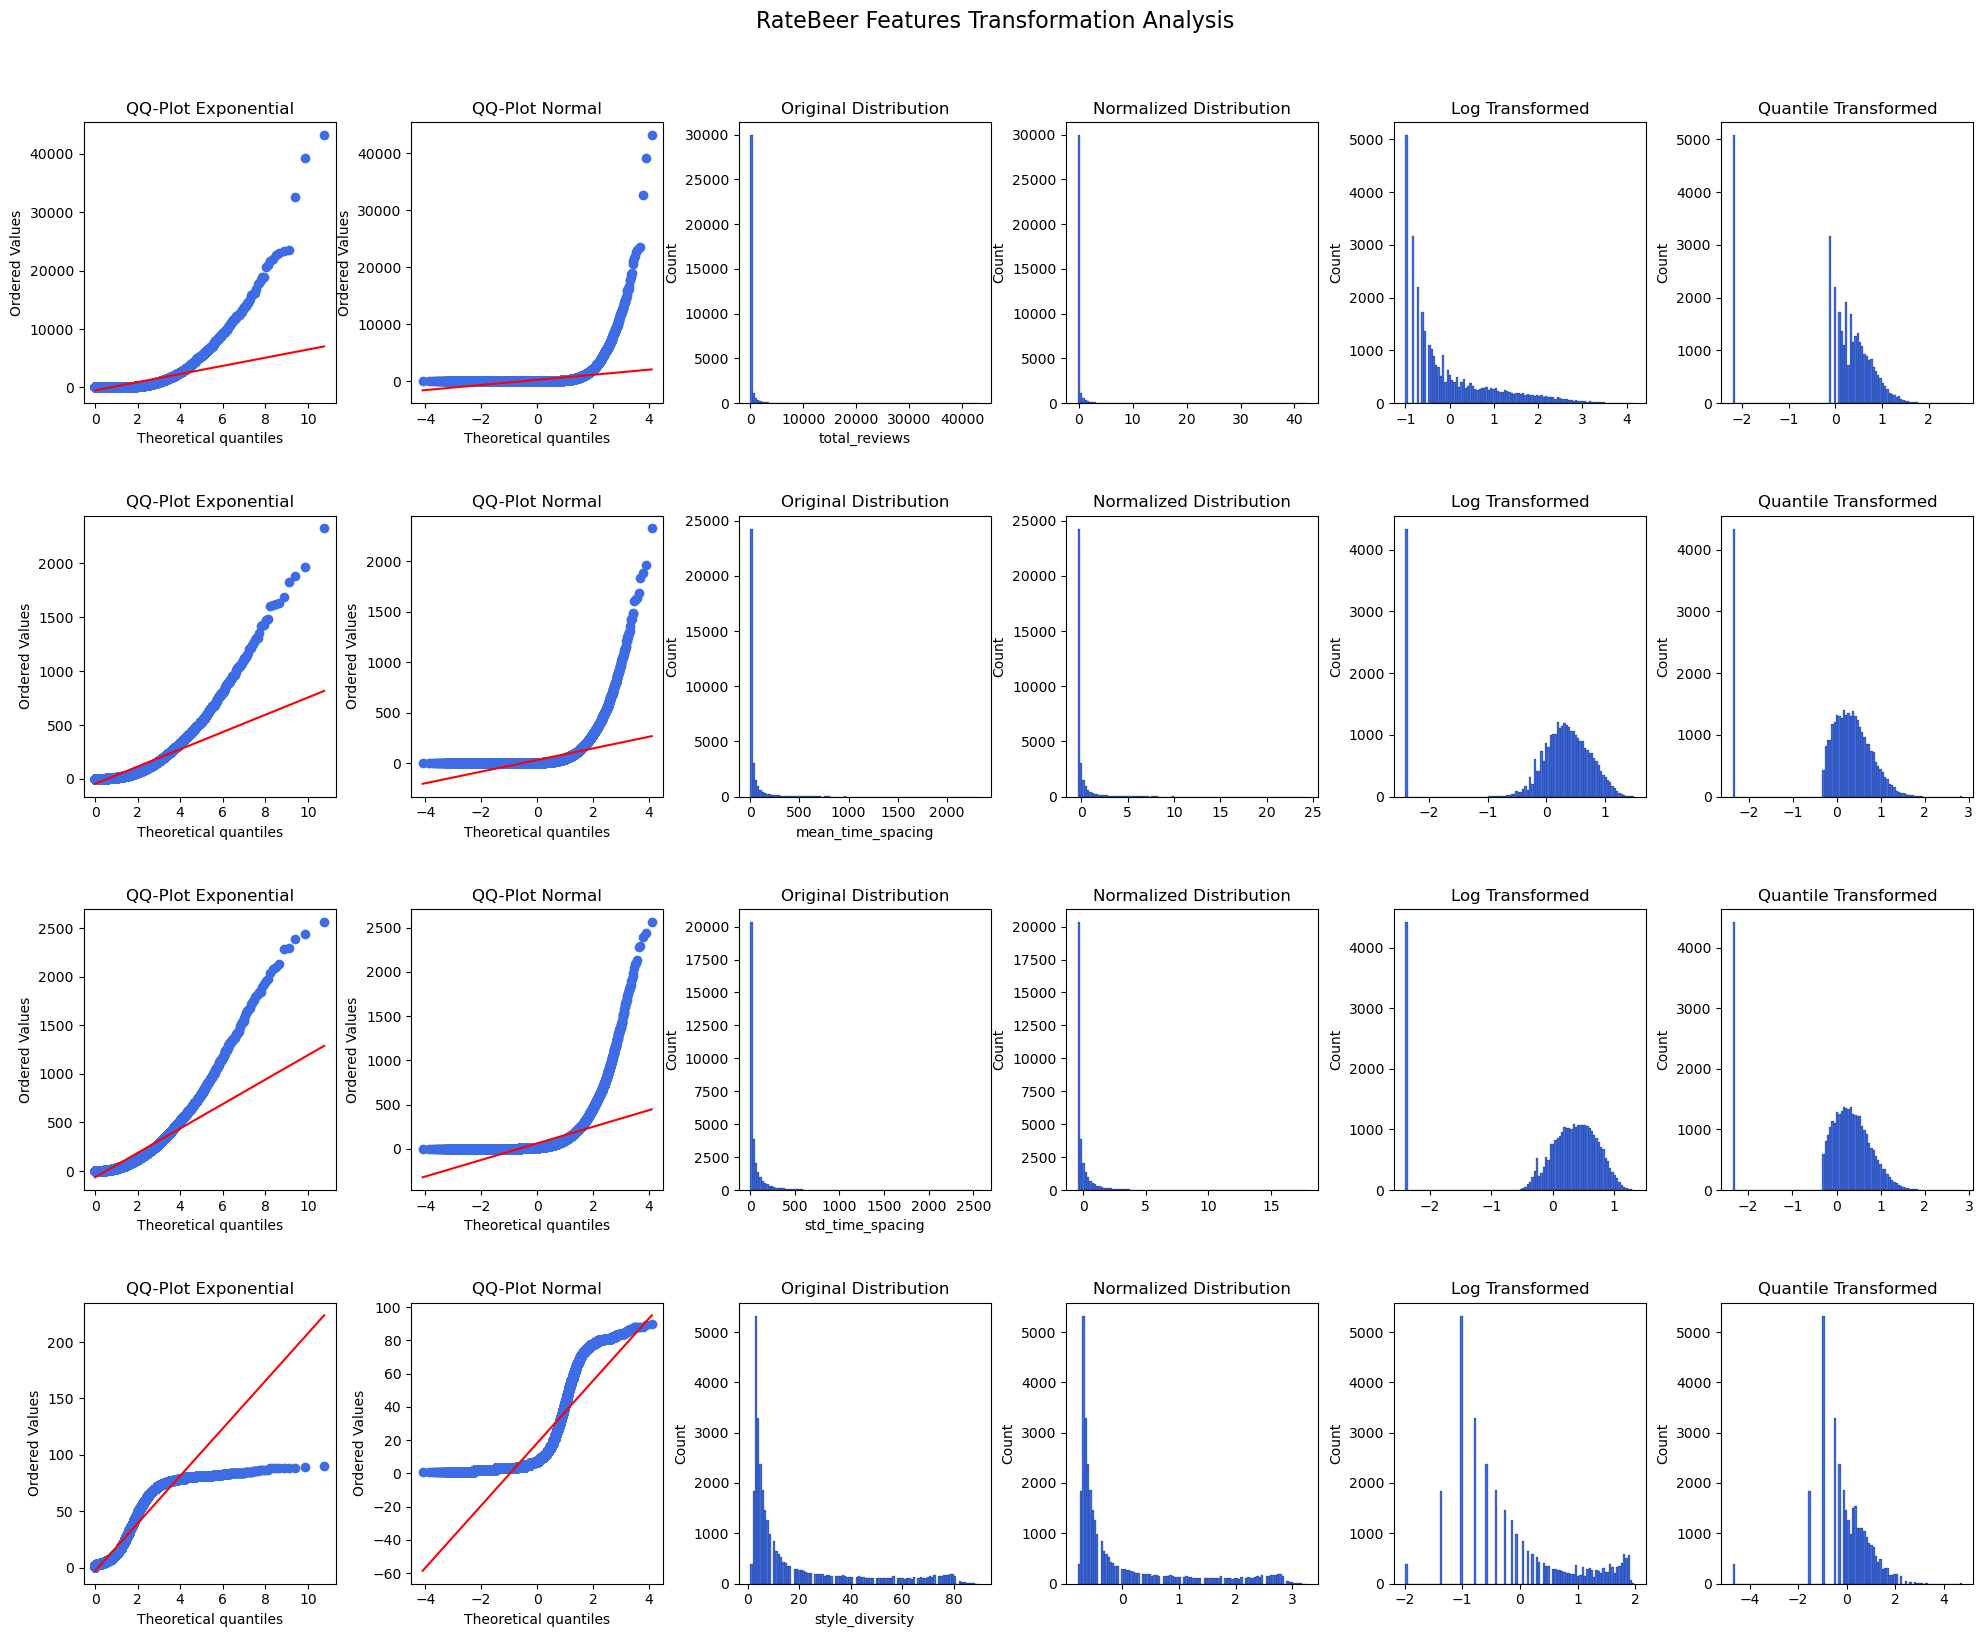

In [14]:
figs[1]

Both *mean_time_spacing* and *std_time_spacing* features showed significant improvement after applying the transformation. However, a clear outlier remains, caused by users who submitted all their reviews within a single active day, resulting in a value of 0 for both features. 
The features *total_reviews* and *style_diversity* had limited success in reshaping, as their distributions remained somewhere between normal and exponential. Additionally, the quantile transformation introduced an additional outlier in total_reviews.

Next, we will use Principal Component Analysis (PCA) with 2 components to compare the log and quantile transformations applied to the features. By applying PCA separately to each transformation, we can visualize the resulting group formations and identify differences in how well the transformed features contribute to clustering. 
PCA reduces the dimensionality of the data while retaining most of the original information, allowing us to focus on the most important patterns. The goal is to determine which transformation method produces more distinct and meaningful group formations.

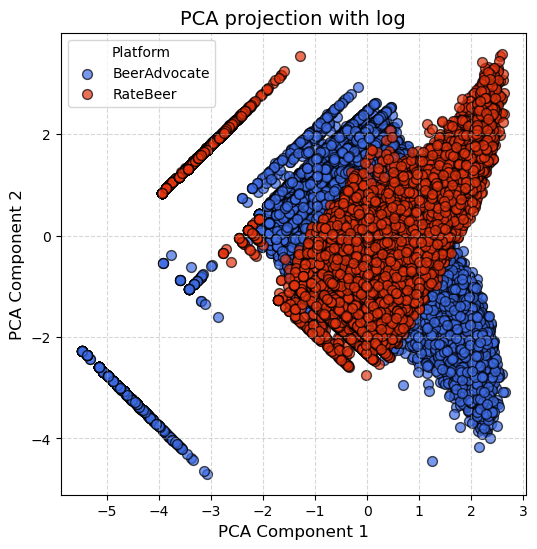

In [15]:
figs[2]

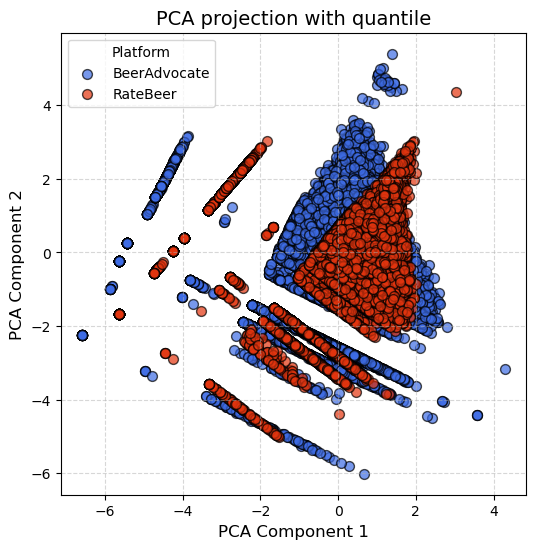

In [16]:
figs[3]

Both QuantileTransformer and log transformation show similar results : a dense main group and a clear outlier line. This outlier pattern aligns with the previous findings from the mean and std time spacing features, and represent users with multiple reviews in a single active day (0 time spacing). We may want to exclude these users to remove the outlier pattern and improve the clustering performance.

In addition to this outlier line, the quantile transformation produced other smaller lines, which may be caused by outliers in *style_diversity* and *total_reviews*.

Both transformations highlight the dense group of users. However, the log transform provides a more interpretable structure in the PCA projection (with only one easy interpretable outlier) and thus, makes it a more suitable choice for further analysis.

### Clustering

#### Cleaned, transformed and normalized features

To remove the outlier line pattern observed in the mean_time_spacing and std_time_spacing features, users who submitted all their reviews on a single active day (resulting in both features having a value of 0) were excluded, correcting the distributions of the features to ensure an unbiased clustering.

After removing the outliers, the features were transformed using the logarithmic transformation, which improved interpretability by reducing skewness and bringing the distributions closer to a normal shape. The updated distributions reflect a more balanced dataset, better suited for clustering and subsequent analysis.

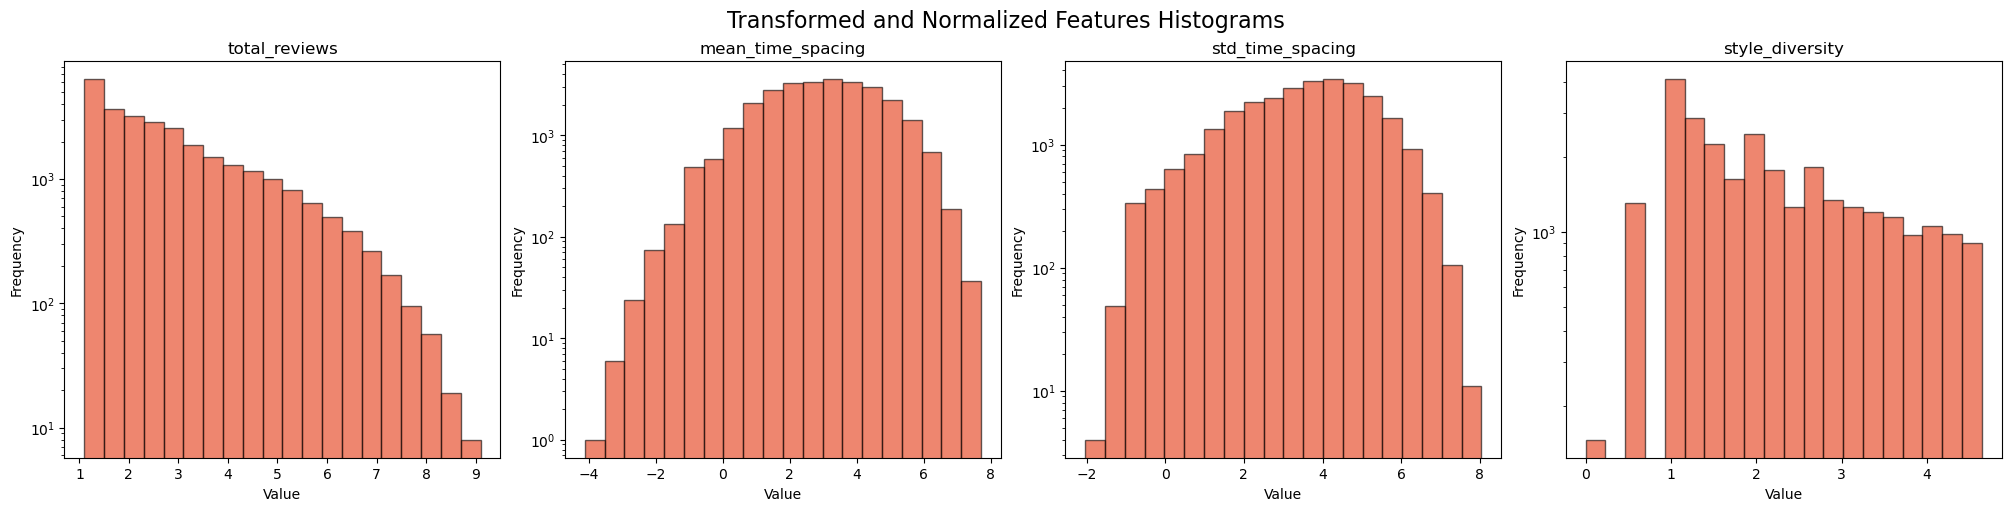

In [17]:
figs[4]

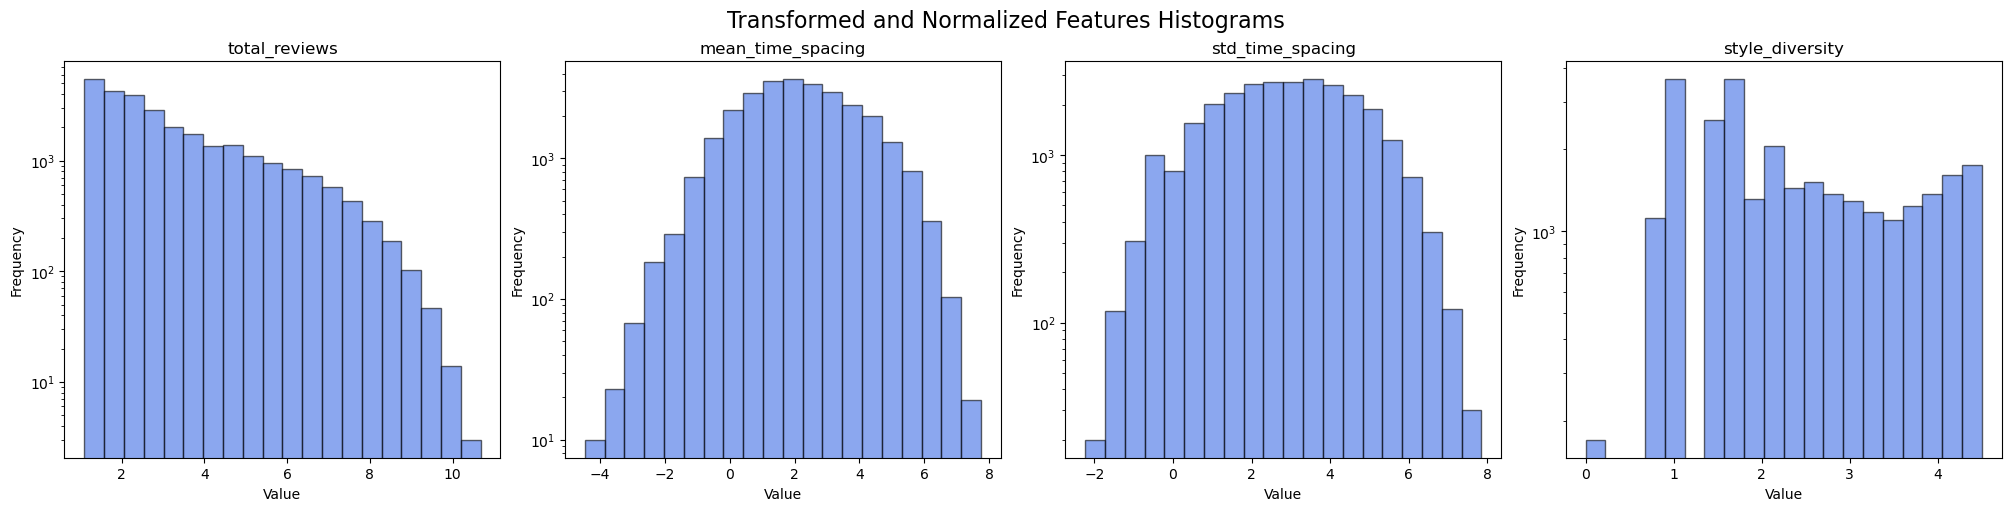

In [18]:
figs[5]

#### Clustering Metrics
To determine the optimal number of clusters, we used clustering metrics analysis such as the elbow method and the silhouette score method. These methods help identify the balance between compactness and separation of clusters.

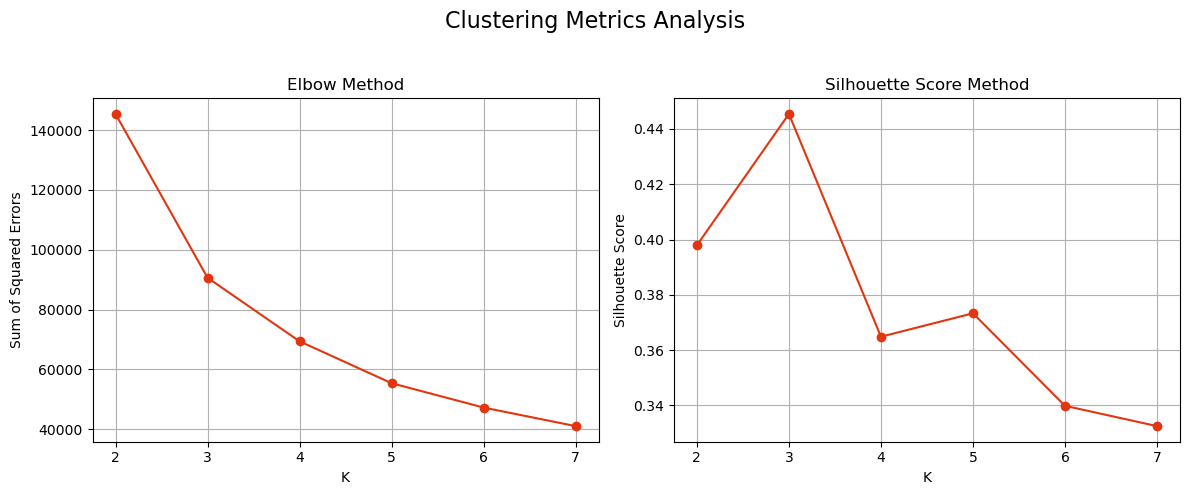

In [19]:
figs[6]

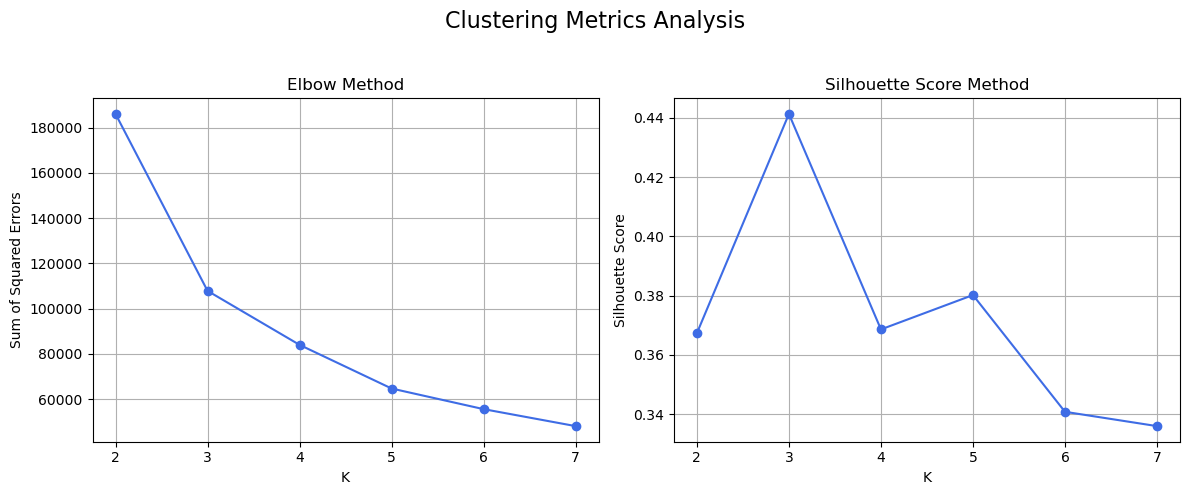

In [20]:
figs[7]

The both methods for the two datasets show an optimum of 3 clusters.

### Clusters

In [21]:
display(ba_clust_summary)

total_reviews                              mean_time_spacing  \
                     mean median         std min   max              mean   
users_type                                                                 
experienced    269.746546  100.0  528.306842  15  8970         11.593292   
occasional       9.980541    7.0    8.225465   3    70        133.919940   
transient        8.497422    6.0    7.036243   3    91          6.350054   

                                                      std_time_spacing  \
                median         std       min      max             mean   
users_type                                                               
experienced   8.015937   10.781179  0.016023    80.96        37.212597   
occasional   75.769841  167.985260  9.954545  2244.50       192.187560   
transient     4.500000    8.055515  0.033333   257.50         7.713636   

                                                           style_diversity  \
                 median         std       min          max            mean   
users_type                                                                   
experienced   23.677067   40.806946  0.130060   406.917261       45.248928   
occasional   117.502042  221.178639  1.414214  3119.048012        7.085124   
transient      5.655276    6.776709  0.182574    35.718113        6.065400   

                                        
            median        std min  max  
users_type                              
experienced   39.0  24.228286   7  104  
occasional     5.0   4.834806   1   33  
transient      5.0   3.891974   1   27

In [22]:
display(rb_clust_summary)

total_reviews                                mean_time_spacing  \
                     mean median          std min    max              mean   
users_type                                                                   
experienced    787.312644  210.0  1864.347195  22  43251          5.984666   
occasional      13.701032    8.0    14.367507   3    142         93.816644   
transient        9.900851    7.0     8.993056   3    137          3.617746   

                                                          std_time_spacing  \
                median         std       min          max             mean   
users_type                                                                   
experienced   3.949221    6.069955  0.011429    55.661765        22.572556   
occasional   44.704293  143.155661  6.000000  2326.500000       156.599675   
transient     2.500000    4.193649  0.011364   181.000000         5.247197   

                                                          style_diversity  \
                median         std       min          max            mean   
users_type                                                                  
experienced  12.326655   29.004733  0.106597   346.265549       50.072353   
occasional   86.662223  206.690840  2.121320  2567.504722        8.371553   
transient     3.642841    4.680872  0.106600    23.297408        6.492791   

                                       
            median        std min max  
users_type                             
experienced   49.0  19.685108  10  90  
occasional     6.0   6.227395   1  43  
transient      5.0   4.281561   1  38

The separation was similar across both platform, with 3 clusters, each characterized by specific user behaviors:
- Experienced : A cluster of users with a high total reviews and significant diversity in beer styles.
- Transient : A cluster of users with a medium low total reviews but short time spacings, meaning these users have an intense activity on a short period of time but do not write any more reviews after. 
- Occasional : A cluster of users who returns occasionally to write reviews.

### Visualization of the clusters

#### PCA

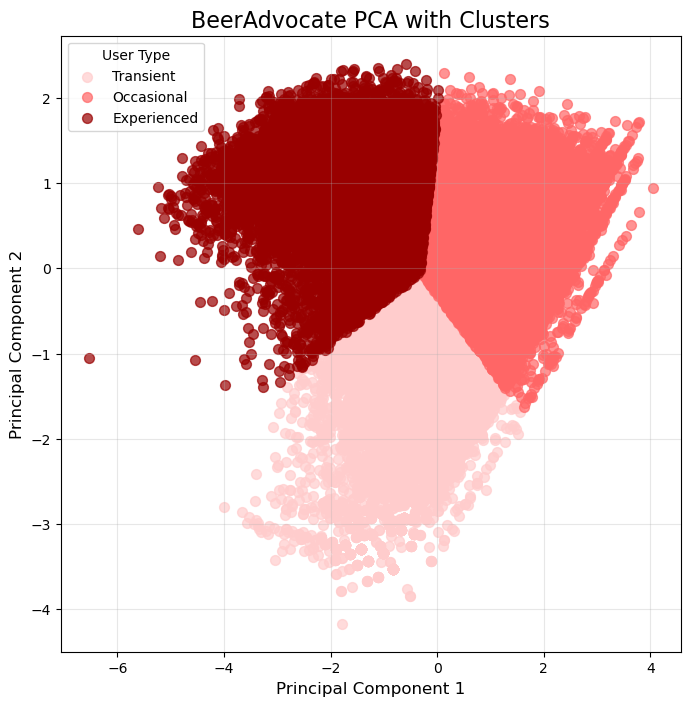

In [23]:
figs[8]

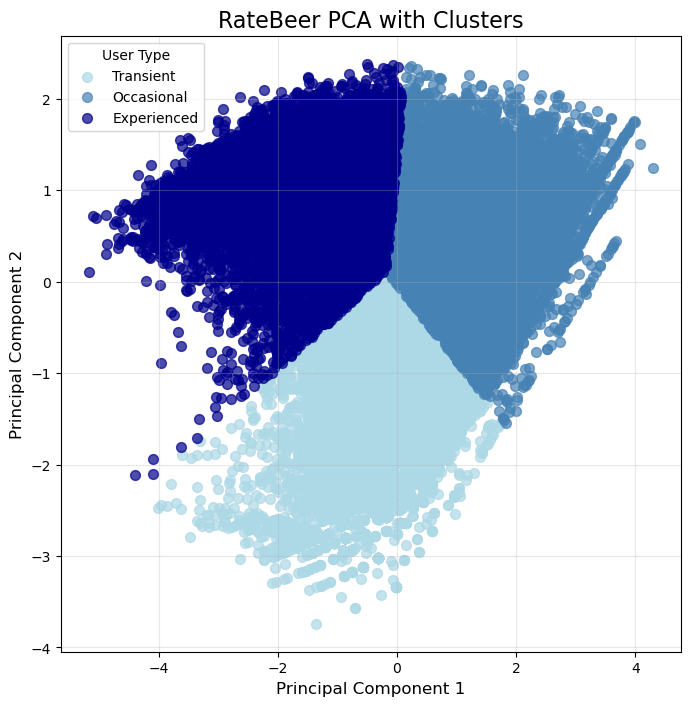

In [24]:
figs[9]

This second PCA is free from the previous outliers. It shows similar groups repartition between BeerAdvocate and Ratebeer and we can clearly see the distinction between the 3 groups. A deeper analysis will be done on the features of each cluster.

### Features

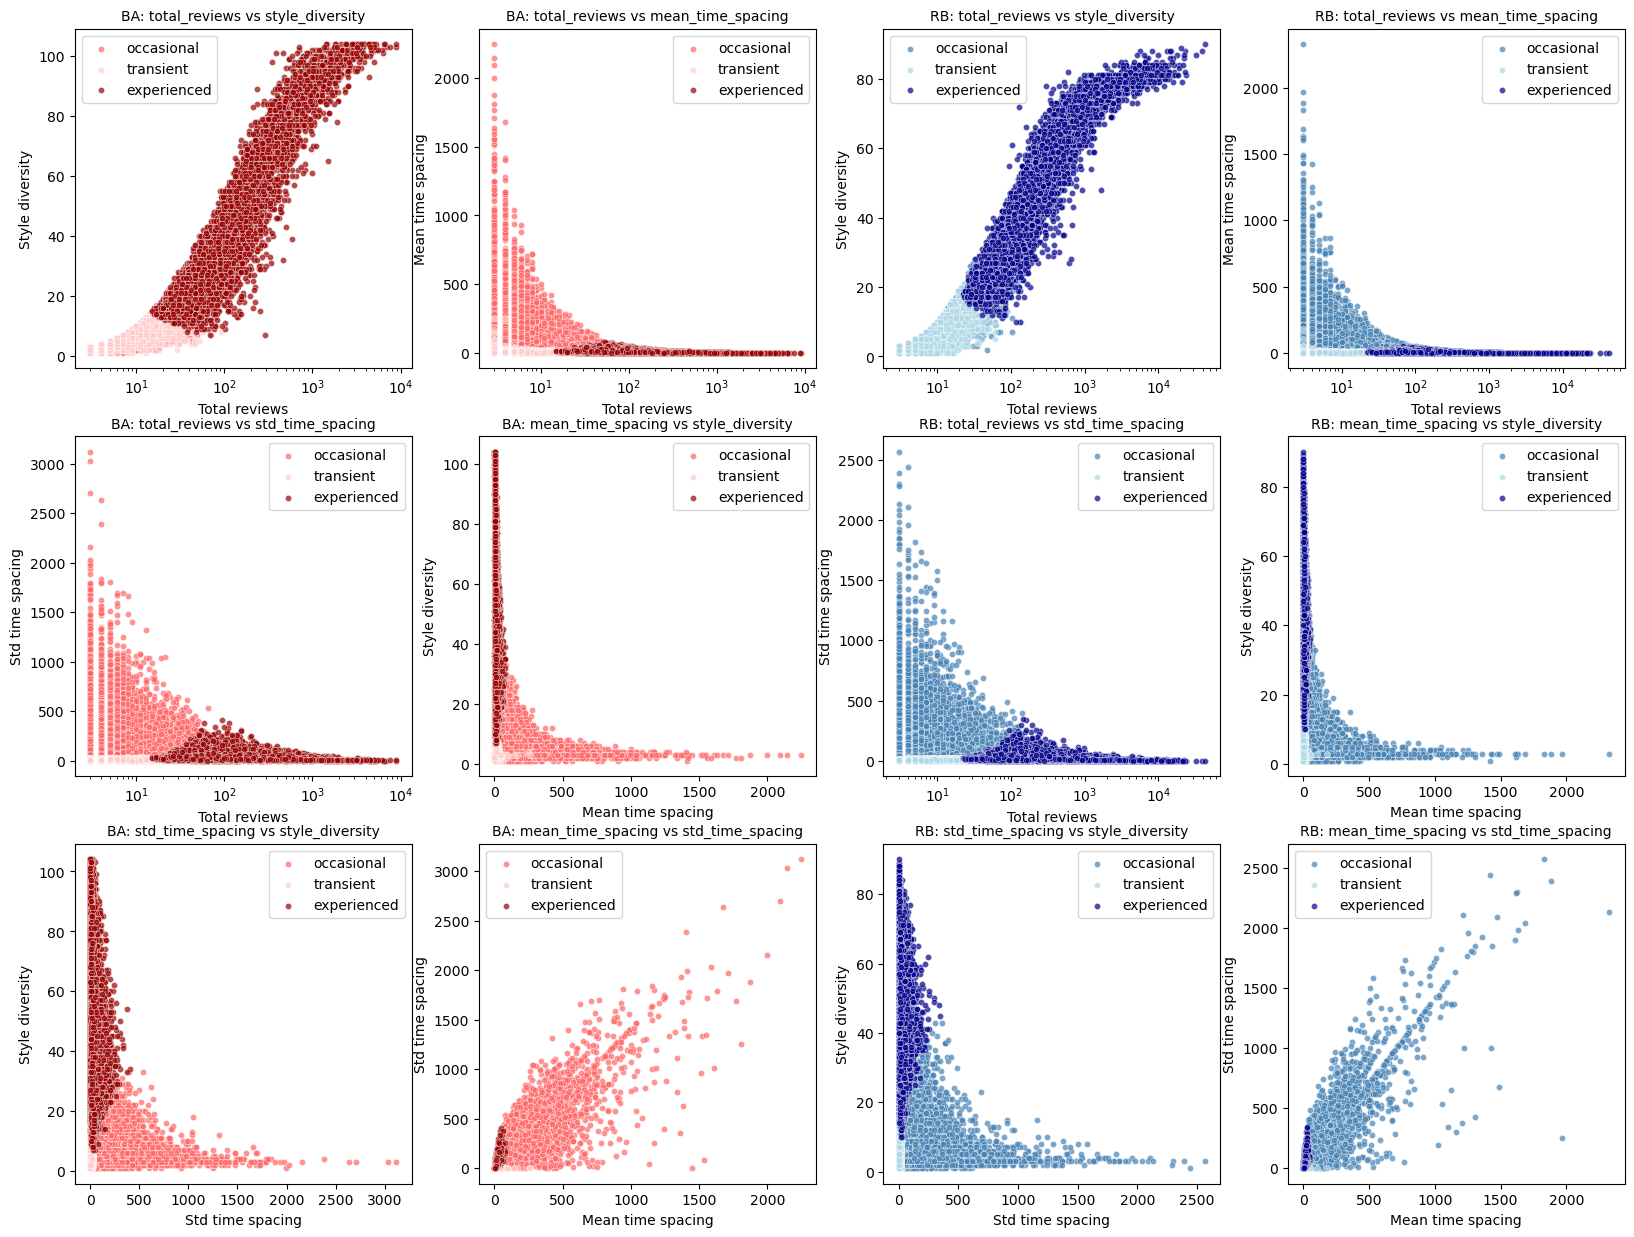

In [25]:
figs[10]

The visualizations of the features demonstrate a clear separation between the 3 groups. 

While the clustering appears effective, the graphs also suggest that similar results could be approximated by applying thresholds to the features. In the next section, we will explore this possibility further, by comparing with the results of the first method. 

### Thresholds VS Clusters

We aim to compare the initial experienced group, identified using method 1, with the experienced group obtained through clustering. Specifically, we want to determine if the majority of experts from the first method are included within the experienced cluster.

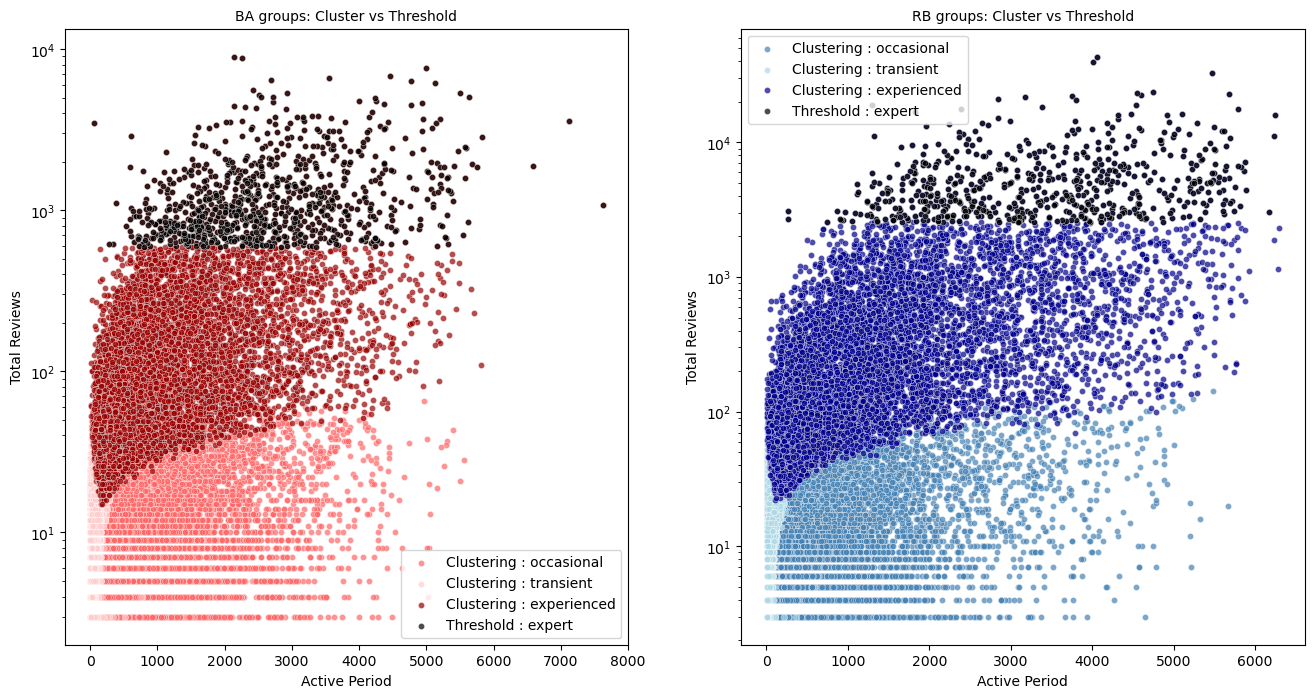

In [26]:
figs[11]

|                                | BeerAdvocate | RateBeer  |
|--------------------------------|--------------|-----------|
| *Number of experienced users with Clustering method* | 8396         | 8652      |
| *Number of experienced users with Threshold method*  | 902          | 611       |
| *Percentage of experienced users from Threshold in group from Clustering* | 100.00%      | 100.00%   |

Comparing the user ids, we could see that the group obtained by threshold method in completely included into the cluster. This is the subgroup of experienced users describing the higher ammount of the reviews. Actually, this is not so surprising… The threshold method focuses on identifying users with a high number of reviews, highlighting those who have consistently engaged with the platform over time, while clustering groups users based on other behavioral pattern, the number of reviews also being included in the features. And it seems that this one allows for a good separation.

By taking the experts identified through the threshold method, we prioritize users whose contributions are quantifiable and whose knowledge is backed by substantial activity. Since they represent already 50% of the reviews, this refined subset serves as a sufficient and solid foundation and offers a focused lens for deeper analysis.

# Language Detection 

We utilized the powerful fastText library to analyze the language of our experts’ reviews. FastText stood out for its robust performance, ease of use, and the ability to handle large-scale data efficiently, making it an excellent choice for our analysis. 

In [10]:
ba_languages, ba_pie_language, ba_reviews_experts_en = language_detection.apply_language_detection(data_ba["experts"], "BeerAdvocate")

Languages detected for BeerAdvocate: 


In [11]:
display(ba_languages)

num_languages  review_proportion_percentage
language                                             
__en            1250674                      99.98993
__fr                122                       0.00975
__de                  3                       0.00024
__it                  1                       0.00008

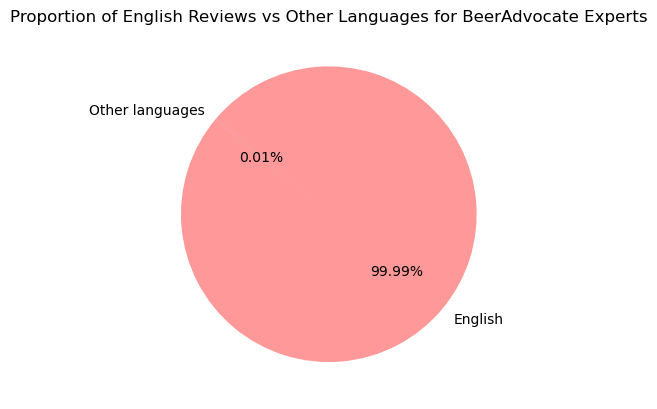

In [12]:
ba_pie_language

*Comment:* The vast majority of BeerAdvocate users speak English. A very small proportion speak German(de), French(fr) or Italian(it). Given the similar result for RateBeer (see RateBeer section), we have decided to remove users whose reviews are not in English from our study.

In [13]:
rb_languages, rb_pie_language, rb_reviews_experts_en = language_detection.apply_language_detection(data_rb["experts"], "RateBeer")

Languages detected for RateBeer: 


In [14]:
display(rb_languages)

num_languages  review_proportion_percentage
language                                             
__en            3412968                      95.87487
__de              44389                       1.24695
__fr              36989                       1.03907
__no              18628                       0.52329
__sv              11912                       0.33462
__pl               8238                       0.23142
__it               8084                       0.22709
__nl               6990                       0.19636
__es               6909                       0.19408
__da               4432                       0.12450
__fi                 83                       0.00233
__nn                 76                       0.00213
__pt                 47                       0.00132
__sk                 19                       0.00053
__ja                 12                       0.00034
__uk                  5                       0.00014
__et                  5                       0.00014
__ceb                 4                       0.00011
__ko                  3                       0.00008
__cs                  3                       0.00008
__ru                  2                       0.00006
__hu                  2                       0.00006
__ga                  2                       0.00006
__eo                  2                       0.00006
__tl                  1                       0.00003
__sw                  1                       0.00003
__sl                  1                       0.00003
__is                  1                       0.00003
__el                  1                       0.00003
__ar                  1                       0.00003
__gl                  1                       0.00003
__lv                  1                       0.00003
__la                  1                       0.00003
__jv                  1                       0.00003
__af                  1                       0.00003

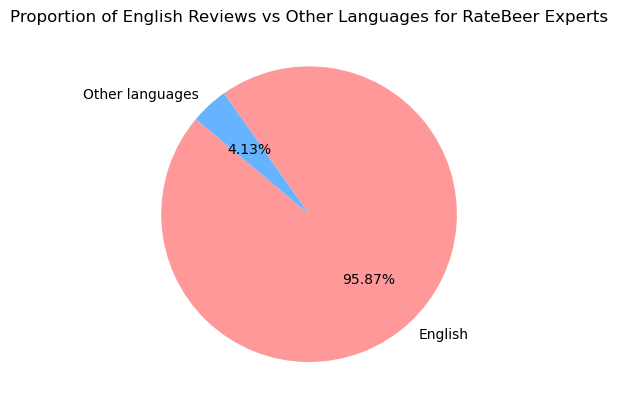

In [17]:
rb_pie_language

*Comment:* The vast majority of RateBeer users speak English, but although the proportion of users using a language other than English is low (<5%), from an accounting point of view this still represents a significant number of users (almost 1.5 million) who speak other languages such as German (de), French (fr), Norwegian (no) and Swedish (sv).

Although the number of non-English reviews here is greater, we have decided to keep only the English reviews, which represent more than 95% of our data for RateBeer.

# Sentiment Analysis 

Sentiment analysis involves determining the emotional tone behind a body of an experts review. One popular tool for sentiment analysis is VADER (Valence Aware Dictionary and sEntiment Reasoner). VADER operates by analyzing the polarity of words and assigning a sentiment score to each word based on its emotional value. The tool then combines these scores into an overall sentiment score for the entire review, which consists of four components:

Positive (pos): The proportion of the review that expresses a positive sentiment.
Negative (neg): The proportion of the review that expresses a negative sentiment.
Neutral (neu): The proportion of the review that is neutral or lacks clear sentiment.
Compound: The aggregated sentiment score that ranges from -1 (extremely negative) to +1 (extremely positive).

The final score is obtained by thresholding the compound score :
Compound score > 0.05: Positive sentiment
Compound score < -0.05: Negative sentiment
Compound score between -0.05 and 0.05: Neutral sentiment

In [18]:
figs = sentiment_analysis.sentiment_analysis_analyser(ba_reviews_experts_en, rb_reviews_experts_en)

## BeerAdvocate

First we analyse the repartition of sentiment scores for each review.

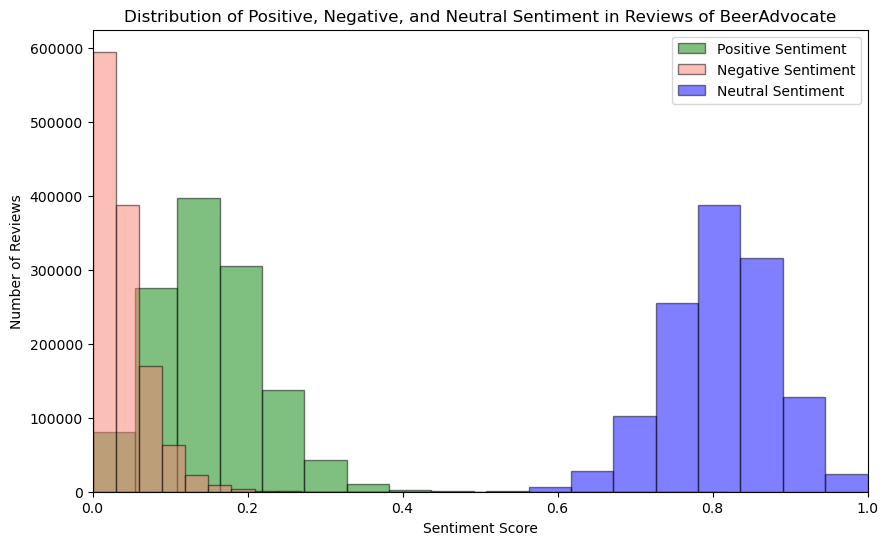

In [19]:
figs[0]

The majority of negative sentiment scores are heavily concentrated near 0.0. This indicates that most reviews on BeerAdvocate have very little proportion of negative tones, with only a small portion registering as somewhat negative (scores between ~0.05 and 0.1).

Positive sentiment scores are spread out primarily between 0.1 and 0.3, with peaks at around 0.1–0.2. This suggests that many reviews show mildly positive sentiment, but strong positivity is less common (no significant scores above ~0.3). Compared to negative sentiment, the distribution of positive sentiment is broader and more significant in volume.

Neutral sentiment scores are significantly higher than both positive and negative scores.The distribution clusters tightly between 0.6 and 0.9, indicating that a large number of reviews are identified as having a neutral sentiment score (a large proportion of neutral words). We can see that the review are still being quite descriptive, with a small proportion of the reviews being considered clearly positive or negative.

Lets now have a look at the compound score :

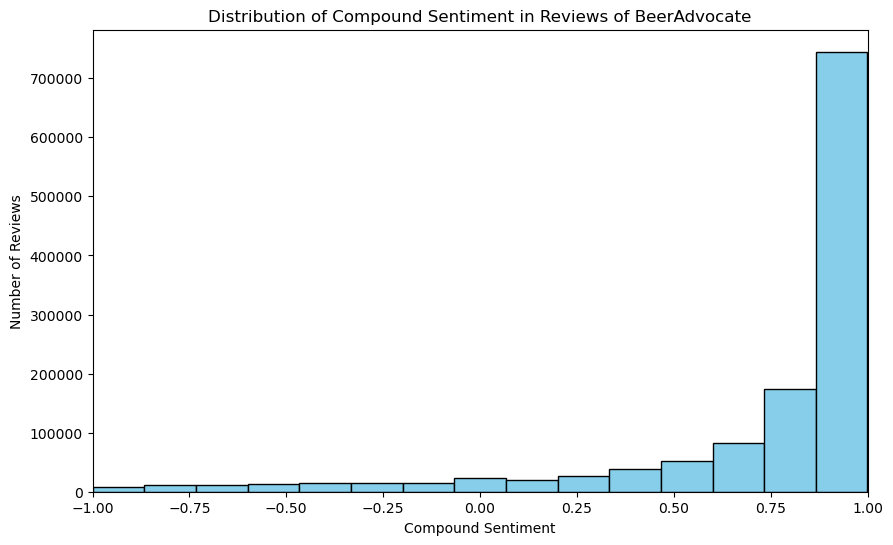

In [20]:
figs[1]

The graph shows a strong positive skew in the distribution of compound sentiment scores, with most reviews concentrated near 1.0 (highly positive sentiment). Negative reviews, represented by scores closer to -1.0, are extremely rare, while neutral reviews near 0.0 are also minimal. There is a gradual increase in the number of reviews as the sentiment becomes more positive, and overall, the data indicates a clear positive sentiment bias. Now based on the thresholding we categorize each review as negative, positive or neutral.

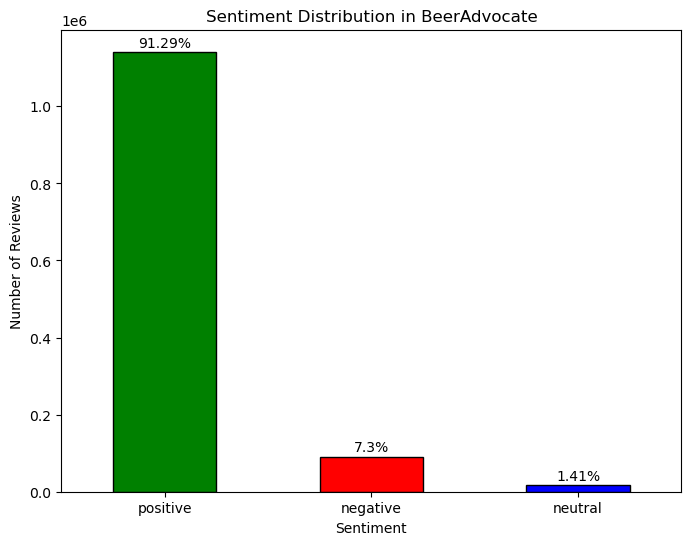

In [21]:
figs[2]

This follows what we could see on the compound sentiment graph with 91.03% of reviews classified as positive. This large majority indicates that users tend to express favorable or appreciative opinions in their reviews. The dominance of positive sentiment aligns with common patterns observed in online review platforms, where users are more likely to share positive experiences. 7.54% of reviews are classified as negative. The low percentage of negative sentiment highlights that users seldom express strong criticism. This could reflect platform culture or reviewer behavior, where negative feedback is minimized. Only 1.43% of reviews are classified as neutral. The minimal proportion of neutral sentiment suggests that reviews on this platform are typically opinionated (leaning towards positive or negative), with fewer instances of balanced or neutral language.

The chart highlights a strong positive sentiment among reviews, with minimal neutral content and limited negative feedback. This chart focuses on overall sentiment classification (positive/negative/neutral), unlike previous histograms that explored sentiment scores more granularly.

## RateBeer

We now do the same for Ratebeer.

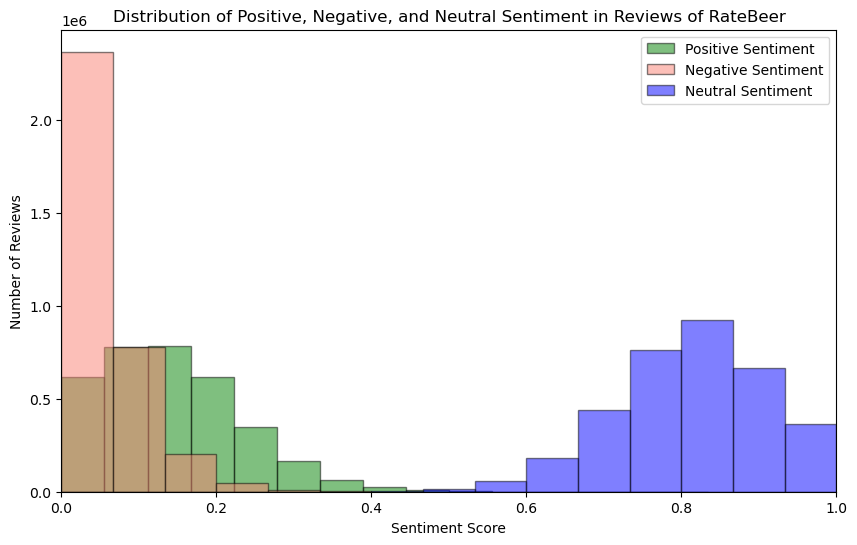

In [22]:
figs[3]

Again the negative sentiment scores are concentrated close to 0. The vast majority of reviews have a very low negative score, most reviews are not highly negative.

The positive sentiment scores are spread mostly between 0.1 and 0.3, with some occurring slightly higher.There is a noticeable concentration in the low positive range (e.g., 0.1–0.2), but the distribution extends further compared to the negative scores. This indicates that many reviews have some positive sentiment but are not extremely enthusiastic.

The neutral sentiment scores are clearly higher than both positive and negative scores. Most of the neutral sentiment values cluster between 0.6 and 0.9, showing that many reviews have a large part of neutral tone.

The imbalance between neutral and other sentiment types (positive or negative) might indicate that users often post factual or unenthusiastic reviews rather than strongly emotional ones.

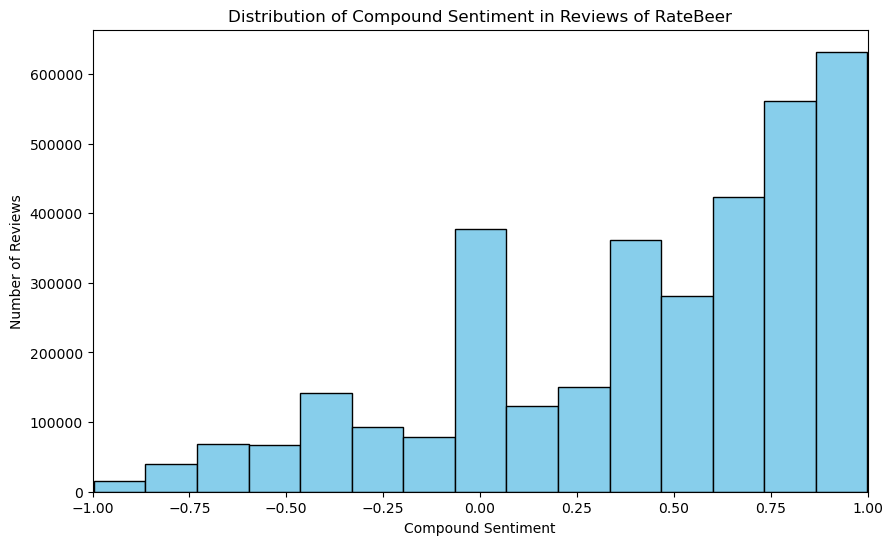

In [23]:
figs[4]

The distribution indicates that the majority of reviews fall in the positive sentiment range (0.5 to 1.0), with the highest concentration near 1.0. There are also a significant number of reviews with a neutral tone (around 0.0), suggesting a balanced perspective for some users. However, the negative sentiment range (below 0.0) is much less represented, highlighting that strongly negative reviews are relatively rare. Overall, the graph reflects a trend toward positive sentiment, while neutral and negative reviews are far less frequent.

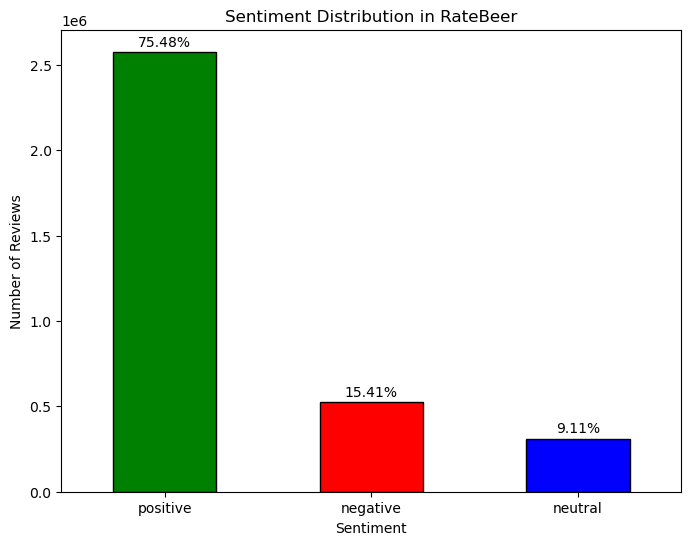

In [24]:
figs[5]

Following what we could see before, majority of reviews (75.31%) are positive, reflecting an highly favorable sentiment among reviewers. Negative reviews make up 15.54%, indicating that a smaller but notable portion of users expressed dissatisfaction. Neutral reviews account for 9.15%, suggesting that a modest group of reviewers maintained a balanced or objective tone. Overall, the data highlights a strong positive bias, with most reviewers leaning toward upbeat and enthusiastic feedback, while negative and neutral sentiments are significantly less common.

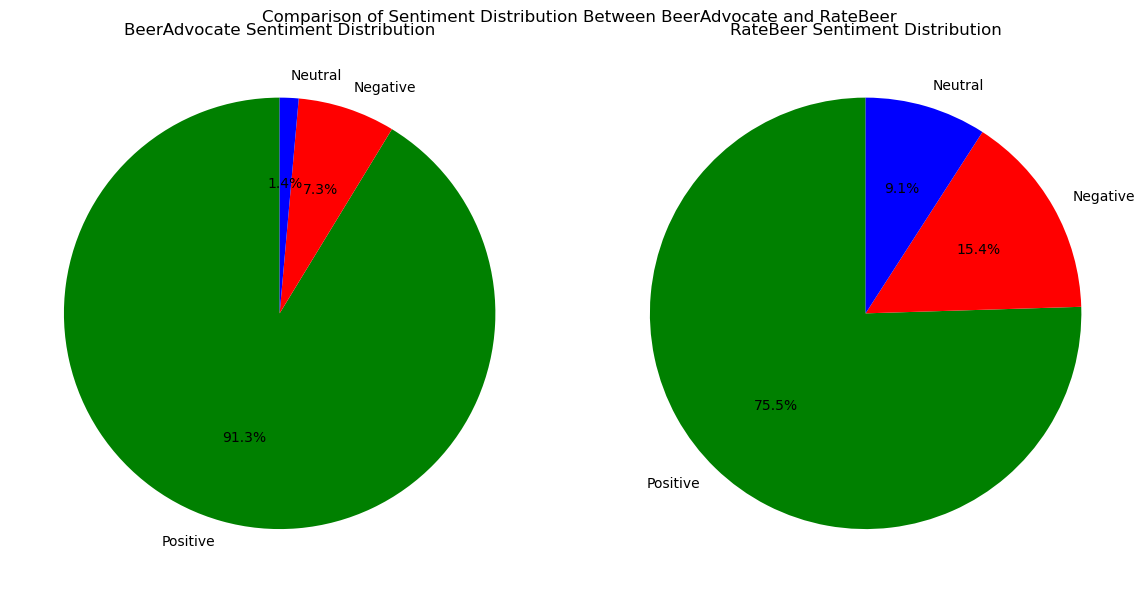

In [25]:
figs[6]

The comparison shows that BeerAdvocate has a significantly higher proportion of positive reviews (91%) compared to RateBeer (75.3%), reflecting a more enthusiastic and celebratory tone among its users. On the other hand, RateBeer has a noticeably larger share of negative reviews (15.5%) compared to BeerAdvocate’s 7.54%, suggesting that RateBeer reviewers are more critical and willing to express dissatisfaction. Neutral reviews are also more prevalent on RateBeer (9.15%) compared to BeerAdvocate’s minimal 1.43%, indicating that RateBeer users provide more balanced or factual feedback. Now lets compare both datasets.

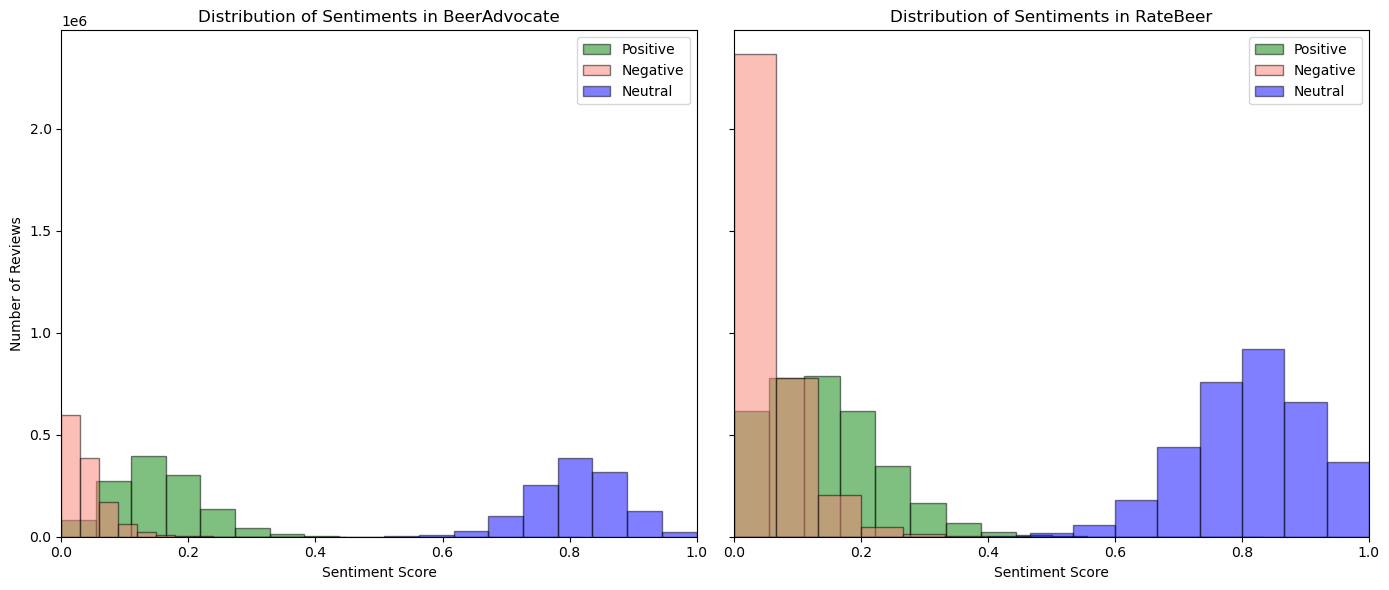

In [26]:
figs[7]

When we plot both graphs on the same scale it is normal that we see different plots, since Ratebeer has more experts reviews than Beeradvocate. For the rest of our analysis we will focus on the general tendency of sentiment scores on each website. If we compare both datasets we see that they have a similar distribution of positive, negative and neutral score. The majority of reviews have a negative sentiment score of 0, positive sentiment scores are spread out but most concentrated between 0.1 and 0.3, showing that many reviews are mildly to moderately positive. The neutral sentiment score is the most prominent in the 0.6 to 0.8 range. This shows a clear group of reviewers providing balanced or factual feedback without leaning heavily positive or negative.

Finally by comparing this with the pie chart we can see that a high neu score does not necessarily mean the review is entirely neutral in tone. It simply suggests that the text contains a significant amount of neutral content (e.g., factual descriptions or non-emotional language). The sentiment label (positive, negative, neutral) is determined based on the compound score: Compound score ≥ 0.05 → Positive Compound score ≤ -0.05 → Negative -0.05 < Compound score < 0.05 → Neutral Even if a review has a high neu score, it might still have a sufficiently high compound score to be labeled as positive or negative.

Many reviews may have a mix of neutral and emotional language. A review like "The beer has a smooth texture and a pleasant taste" might have a high neu score for its descriptive language but still register a high compound score because of positive words like "smooth" and "pleasant." Similarly, "The beer lacks flavor and is quite bland" may also have a high neu score for its descriptive content but a low compound score due to negative words like "lacks" and "bland."

Finally the compound score threshold for a "neutral" label is narrow, so most reviews with high neu scores still fall into the positive or negative categories based on small emotional signals. Many reviews may be fact-heavy or descriptive but still contain enough emotional cues to lean positive or negative in their compound score.This could suggest that reviewers tend to describe beers objectively (e.g., texture, aroma, flavor) while subtly expressing a sentiment.

Next we want to look at the content of the reviews.

# Naive Topic Detection

## Introduction to the Method

The goal of this section is to perform a naive and quick exploration of the most frequent words in the BeerAdvocate and RateBeer expert reviews using WordClouds.

Why is this relevant?
- WordClouds provide a visual representation of word frequency, where larger words appear more often in the corpus.
- This approach allows us to quickly identify dominant themes or terms without complex preprocessing or modeling.
- It serves as a first step toward understanding the vocabulary and topics used in each platform’s reviews, highlighting key words that stand out.

While this method is not as sophisticated as advanced techniques (like LDA), it is easy to implement and interpret, making it ideal for an initial exploration of text data.

## How It Works

1. Text Combination:
   - All reviews for each platform (BeerAdvocate and RateBeer) are combined into two large text corpora.
2. Preprocessing:
   - Conversion to lowercase.
   - Removal of stopwords, punctuation, and overly common terms like "beer" or "beers" that add little meaning.
3. WordCloud Generation:
   - A WordCloud is generated for each platform, where word size reflects its frequency in the text.

## What This Method Reveals

- Key words that dominate BeerAdvocate and RateBeer expert reviews.
- Initial insights into the platforms' focus:
  - Do the reviews center on taste, aroma, or presentation?
  - Are there visible patterns that differentiate the two platforms?

## Lemmatization for WordCloud (not-implemented for ressource issues)

We aimed to generate a WordCloud using lemmatized text instead of raw text. Lemmatization reduces words to their base or dictionary form (e.g., "running" → "run", "better" → "good"), which helps group different forms of the same word under a single term. This process enhances the WordCloud's interpretability because: 
- Words like "flavors" and "flavor" will be counted as the same word ("flavor").
- Different grammatical forms of a word (e.g., verbs, plurals) are unified, making the WordCloud more informative.

Unfortunately, the process of lemmatization for the full dataset requires significant computational resources due to: the large size of the text corpus (several million characters) and the iterative processing of chunks through the spaCy NLP pipeline.

We attempted to split the text into manageable chunks of 250,000 characters each to apply lemmatization iteratively. But, even if this method works it needs a time of approximately 8h to lemmatize ba_reviews_experts, thus we decide to not implement it, but we wanted to highlight that *it could be a way to improve the wordcloud representation*.

In [ ]:
fig_ba = topic_detection_naive.generate_wordcloud(ba_reviews_experts_en)

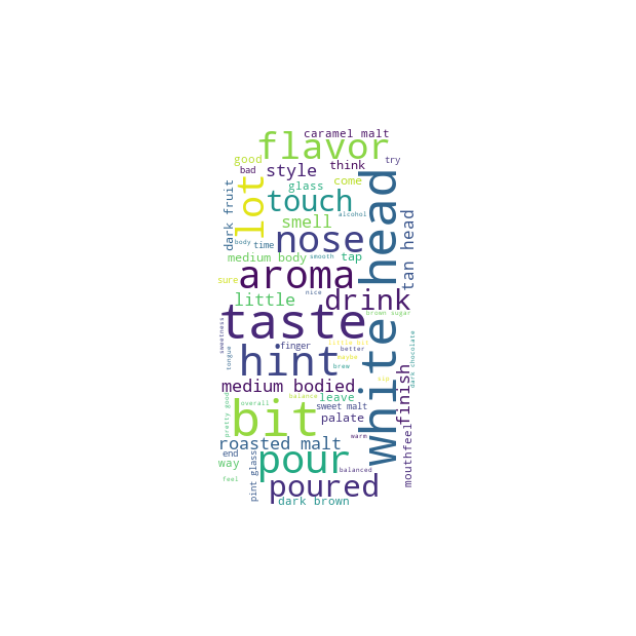

In [13]:
fig_ba

Taste and Flavor Focus:
Words like "taste", "flavor", and "aroma" appear prominently.
This indicates that reviewers place significant emphasis on describing the sensory aspects of beer, particularly taste and smell.

Descriptive Words for Appearance:
Words like "head", "white", "bit", "poured", and "medium bodied" highlight that reviewers also focus on the appearance of the beer.
The word "head" refers to the foam or froth that forms when beer is poured, and "white" suggests a common observation of its color.
"poured" indicates users frequently describe how the beer was served.

Nose and Aroma:
Words like "nose" and "smell" suggest that the aroma of the beer is another key consideration.
Descriptive terms like "dark fruit" and "roasted malt" are used to characterize specific aromatic qualities.
Strength and Body:
Terms such as "medium body", "bodied", and "palate" indicate reviewers often discuss the mouthfeel and overall body of the beer.
"Medium bodied" seems to be a frequent descriptor, reflecting a common preference or observation.

Subtle Descriptions:
Words like "hint", "touch", and "bit" reflect a nuanced approach to reviewing. Reviewers describe subtle notes they detect in flavor, aroma, or texture.

Finish and Aftertaste:
The presence of words like "finish" and "leave" suggests that the aftertaste or lingering effects of the beer on the palate are also discussed.

Positive and Neutral Observations:
Words such as "good", "smooth", and "balanced" appear (less often), showing that reviews likely feature positive tones.
Terms like "bad" are smaller, indicating that negative descriptors are less common.

Serving Context:
Words like "glass", "pint", and "tank" suggest that the context of how beer is served (e.g., from a glass or pint) plays a role in reviews.

This WordCloud reveals that the expert reviews strongly focus on taste, flavor, aroma, and visual presentation. Words like "taste," "head," "aroma," and "flavor" dominate the reviews, reflecting the detailed and sensory-oriented nature of expert evaluations.

In [14]:
fig_rb = topic_detection_naive.generate_wordcloud(rb_reviews_experts_en)

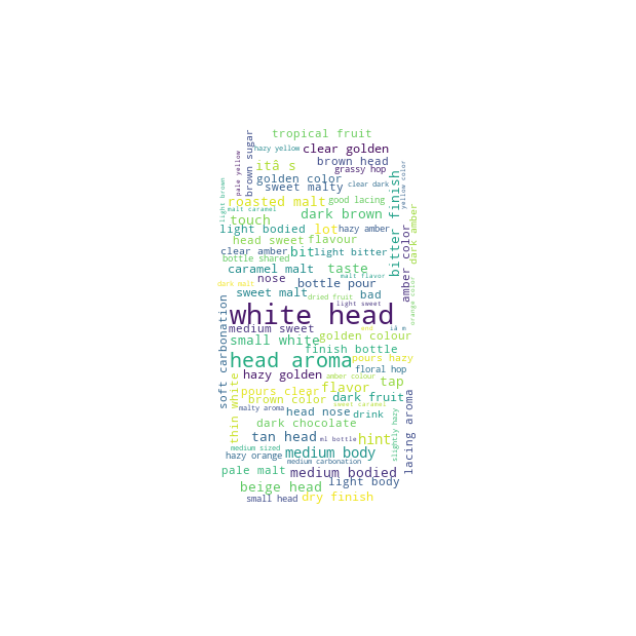

In [15]:
fig_rb

"white", "head", and "aroma" are the most prominent words in the cloud, suggesting that reviewers commonly discuss: Appearance: "white head" likely refers to the color and foam that forms when the beer is poured. Scent: "aroma" emphasizes the importance of smell in evaluating beer quality.

Flavor and Taste Descriptions: Words like "roasted malt", "dark fruit", "bitter finish", and "flavor" highlight reviewers' focus on describing taste profiles. The presence of words such as "sweet", "chocolate", and "caramel" indicates that sweet and malty flavors are frequently noted. Terms like "bitter" and "dry finish" suggest attention to the balance between bitterness and smoothness.

Appearance and Color: Several terms relate to the appearance of the beer: "golden", "dark brown", "amber", and "clear" describe the color. Words like "small white", "tan head", and "beige head" highlight the variety of head characteristics.

Mouthfeel and Texture: Words such as "medium body", "light bodied", and "soft carbonation" suggest reviewers frequently comment on the mouthfeel of the beer, particularly its weight and carbonation. Terms like "thin white" and "medium bodied" reflect nuanced descriptions.

Serving and Pouring Context: Words like "bottle", "tap", "pour", and "glass" emphasize that reviewers often reference how the beer was served or poured.

Nuanced and Specific Notes: Words like "hint", "bit", "nose", and "touch" highlight that reviewers frequently describe subtle aspects of flavor and aroma.

Less Frequent Words: Words like "bad" are present but appear much smaller, suggesting that most reviews are more positive or neutral in tone.


**Comparison of both**

When comparing the two word clouds, the second dataset appears to cover a greater variety of topics due to a more even distribution of words. However, these observations are limited by the naive nature of WordCloud, which does not distinguish context or semantic relationships between words.

# Latent Dirichlet Allocation

## Dataset Construction for Topic Detection

To ensure a robust and balanced dataset for topic detection, we implemented an iterative and user-balanced approach for constructing ba_reviews_experts.txt and rb_reviews_experts.txt. This method iteratively selects reviews from each user in the dataset until a target number of sentences **(10,000 x 50 = 500,000 sentences)** is reached.

This approach ensures that the datasets used for topic detection are:
- Representative of the full range of users and their contributions.
- Balanced to avoid over-representation of highly prolific users.
- Optimized for topic modeling, as it captures a wide variety of vocabulary and themes while meeting the required size.

### Why This Method?

1. Avoids Prolific User Bias:
   - By iterating over all users and selecting reviews evenly, this method ensures a fair representation of users in the dataset.
2. Captures a Diverse Vocabulary:
   - Each user may focus on different aspects of beers (e.g., taste, aroma, appearance). This method ensures that the dataset includes a variety of styles and perspectives, which enriches the topics detected.
3. Maintains Balance Across Platforms:
   - The same logic is applied to both BeerAdvocate and RateBeer, ensuring that the topic detection results are comparable across platforms.
4. Targets a Specific Number of Sentences:
   - The method systematically aggregates reviews until the required number of sentences is reached, ensuring datasets of equal size for both platforms.
5. Avoids Temporal or Structural Bias:
   - Reviews are not taken sequentially or randomly. Instead, reviews are evenly distributed across users, reducing the risk of introducing biases from review order or submission date.
  
This iterative and user-balanced method significantly improves the representativity, diversity, and balance of the datasets compared to simpler methods (e.g., taking the first 100,000 sentences). This improvement lays a solid foundation for generating reliable and insightful topics in the subsequent LDA analysis.

In [27]:
topic_detection_lda.generate_reviews_txt(ba_reviews_experts_en, rb_reviews_experts_en)

Iteration n°65
BA current total sentences: 479554
Iteration n°66
BA current total sentences: 487048
Iteration n°67
BA current total sentences: 494253
Iteration n°68
BA current total sentences: 501437
Le fichier a été sauvegardé sous le nom 'generated/corpus/ba_reviews_experts.txt'.
Iteration n°160
RB current total sentences: 498500
Iteration n°161
RB current total sentences: 501646
Le fichier a été sauvegardé sous le nom 'generated/corpus/rb_reviews_experts.txt'.


## From Naive to Structured Topic Analysis

In the previous section, we explored the datasets using WordClouds, a naive yet effective way to visualize the most frequent words. This approach gave us a high-level overview of the dominant vocabulary in BeerAdvocate and RateBeer reviews.

However, WordClouds only capture word frequency without accounting for:
- The co-occurrence of words (how words group together to form themes).
- The latent structure or topics that reviewers naturally discuss.

To go beyond this naive approach and uncover the hidden themes in the reviews, with the newly constructed, balanced datasets, we now proceed to Latent Dirichlet Allocation (LDA) to uncover the key themes present in BeerAdvocate and RateBeer expert reviews.

## Why LDA?

LDA is a powerful method because it:
- Automatically identifies topics in a corpus based on word co-occurrences.
- Represents each "document" (here, a chunk of reviews) as a mixture of topics.
- Groups together words that frequently appear in similar contexts to reveal latent themes.

Unlike WordClouds, which simply count word occurrences, LDA provides a structured view of the text by detecting patterns and grouping words into coherent topics.

## How It Works
Text Segmentation:
- Each dataset (BeerAdvocate and RateBeer) is split into smaller chunks of about 50 sentences.
- These chunks act as "documents" for the LDA model.

Text Preprocessing:
- Stopwords, punctuation, and irrelevant tokens are removed.
- Words are lemmatized to group different forms of the same word (e.g., "flavors" → "flavor").
- Named Entities (like locations or brands) and bigrams (word pairs like "dark chocolate") are included to improve topic quality.

LDA Topic Modeling:
- The combined chunks from both platforms are processed using LDA.
- LDA outputs a specified number of topics (e.g., 4 topics), where each topic is represented by a set of words with different weights.

Linking Topics to Datasets:
- Each chunk is assigned a dominant topic (the one with the highest probability).
- Using the source of each chunk (BeerAdvocate or RateBeer), we analyze which topics dominate each platform.

## What This Method Will Reveal

1. The key topics discussed in BeerAdvocate and RateBeer reviews.
2. The focus of each platform:
   - Does BeerAdvocate emphasize sensory details like "aroma" and "citrus"?
   - Does RateBeer highlight presentation or complex flavors like "chocolate" and "roasted coffee"?
3. Actionable insights for new users:
   - Depending on their interests, users can choose the platform that aligns best with their preferences.

In [18]:
fig = topic_detection_lda.apply_LDA()

['ba_reviews_experts.txt', 'rb_reviews_experts.txt']
ba_reviews_experts.txt
Number of sentences: 501444
Number of chunks: 10029 

rb_reviews_experts.txt
Number of sentences: 501646
Number of chunks: 10033 

Number of unique tokens: 25223
Number of chunks: 20000
Topic 0:
[('quot', 0.006490657), ('nose', 0.0062946267), ('ale', 0.0054741134), ('smell', 0.0051845554), ('glass', 0.005153138), ('coffee', 0.0051416345), ('lace', 0.0049500456), ('brew', 0.0049406937), ('leave', 0.004728246), ('mouthfeel', 0.004564359)]
Topic 1:
[('lager', 0.013705852), ('pale', 0.012188864), ('bad', 0.010030576), ('corn', 0.0089643), ('yellow', 0.008724065), ('nose', 0.00658314), ('drink', 0.0063621015), ('gold', 0.0058035078), ('pretty', 0.005779686), ('itâ', 0.0057246718)]
Topic 2:
[('appearance', 0.018402811), ('amp', 0.008923458), ('ounce', 0.00846357), ('lacing', 0.008071698), ('nose', 0.007808356), ('smell', 0.007757246), ('mouthfeel', 0.0071875174), ('ounce_bottle', 0.0069727637), ('overall', 0.00682817

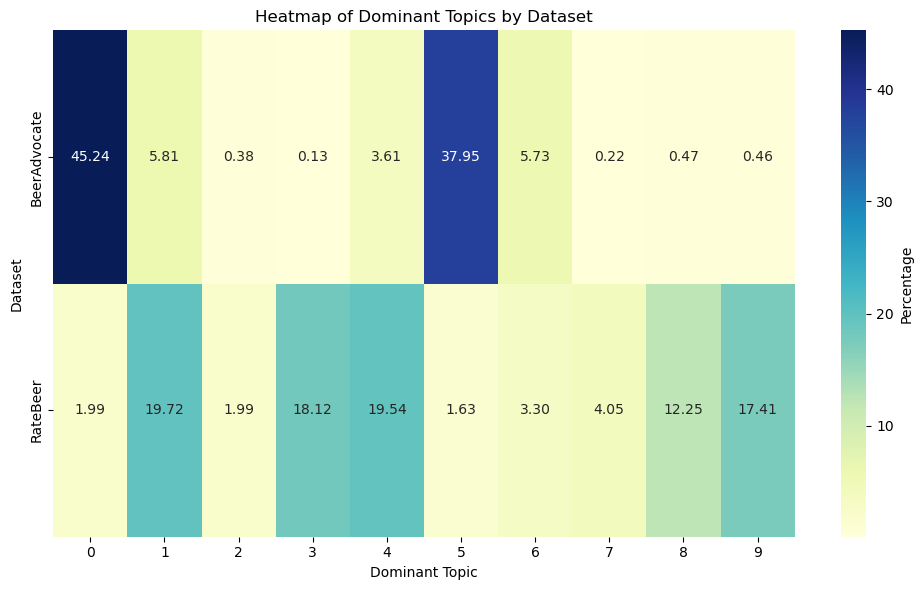

In [19]:
fig

## **Analysis of LDA Results**

#### **Overview of Topic Distribution**

The distribution of topics between BeerAdvocate and RateBeer reviews reveals significant differences in the focus and themes of each platform:

| **Dominant Topic** |   0   |   1   |  2  |  3  |   4  |   5  |  6  |  7  |   8   |   9   |
|--------------------|-------|-------|-----|-----|------|------|-----|-----|-------|-------|
| **BeerAdvocate**   | 4524  | 580   | 38  | 14  | 361  | 3793 | 575 | 22  | 47    | 46    |
| **RateBeer**       | 199   | 1972  |199  |1815 |1954  |163   |330  |403  |1222   |1743   |

#### Key Observations:
- BeerAdvocate topics are **heavily concentrated** in Topics 0, 5, and 1 and 6, with little presence in other topics.
- RateBeer topics are **more evenly distributed**, dominating Topics 1, 3, 4, 7, 8, and 9.

This distribution indicates that BeerAdvocate reviews tend to focus on a **narrower range of thematic categories**, while RateBeer covers a **broader spectrum of beer-related themes**.

---

### **Interpretation of Topics**

Below is an interpretation of each topic based on its top words:

#### **Topic 0 (BeerAdvocate-heavy)**:
- **Top Words**: "quot", "nose", "ale", "smell", "glass", "coffee", "lace", "brew", "leave", "mouthfeel"
- **Interpretation**: Focus on sensory descriptors like aroma ("nose", "smell") and beer appearance in the glass ("lace"). It reflects a traditional beer review style with attention to details like "mouthfeel" and "coffee" notes.

#### **Topic 1 (RateBeer-heavy)**:
- **Top Words**: "lager", "pale", "bad", "corn", "yellow", "nose", "drink", "gold", "pretty"
- **Interpretation**: Discusses lagers, pale beers, and simpler styles (e.g., "corn", "bad"). Highlights RateBeer’s tendency to cover mainstream or lighter beer styles, sometimes critically.

#### **Topic 2 (RateBeer)**:
- **Top Words**: "appearance", "amp", "ounce", "lacing", "nose", "smell", "mouthfeel", "overall"
- **Interpretation**: A structured rating approach focusing on "appearance", "overall" impressions, and sensory details like "smell". Indicates a methodical review style prevalent on RateBeer.

#### **Topic 3 (RateBeer)**:
- **Top Words**: "small", "nose", "pale", "hazy", "yellow", "grain", "citrus"
- **Interpretation**: Mentions of "hazy", "citrus", and "grain" suggest a focus on modern craft beer trends, particularly hazy pale ales.

#### **Topic 4 (RateBeer)**:
- **Top Words**: "yeast", "spice", "citrus", "wheat", "apple", "spicy", "banana"
- **Interpretation**: Notes common in Belgian-style beers, wheat beers, or more complex fruity/spicy profiles. Highlights RateBeer’s ability to capture a broader stylistic range.

#### **Topic 5 (BeerAdvocate-heavy)**:
- **Top Words**: "smell", "glass", "lacing", "finger", "overall", "drink", "great", "mouthfeel"
- **Interpretation**: A structured sensory topic focusing on beer appearance and aroma. Indicates BeerAdvocate’s focus on the visual and aromatic experience.

#### **Topic 6 (Mostly BeerAdvocate)**:
- **Top Words**: "coffee", "nose", "pretty", "feel", "mouth", "great"
- **Interpretation**: Reflects reviews of stouts, porters, or darker beers with coffee flavors. Another sensory-heavy topic focused on aroma and flavor.

#### **Topic 7 (RateBeer)**:
- **Top Words**: "smell", "brewpub", "tap", "rate", "thank", "Beer Buddy", "rate_Beer"
- **Interpretation**: References to "brewpub" and "tap" suggest discussion of drinking environments. Mentions of "Beer Buddy" and "rate_Beer" indicate a focus on tools/platform-specific experiences.

#### **Topic 8 (RateBeer)**:
- **Top Words**: "Taste", "Aroma", "coffee", "citrus", "roasted", "hazy", "Bottle"
- **Interpretation**: Combines descriptors like "citrus" and "roasted coffee", highlighting RateBeer’s diverse coverage of styles.

#### **Topic 9 (RateBeer)**:
- **Top Words**: "flavour", "colour", "malty", "Bottle", "hoppy", "yellow", "pale"
- **Interpretation**: Reflects a more global lexicon with British spellings ("flavour", "colour"). Covers a range of flavor profiles, indicating RateBeer’s international audience and stylistic breadth.

---

### **Insights for New Users**

Based on the results, here’s what each platform offers:

#### **BeerAdvocate**:
- **Themes**: Focus on aroma, appearance, and structured sensory details.
- **Strengths**: Classic beer rating style with detailed visual and aromatic evaluations.
- **Recommendation**: Best for users who value traditional beer reviews emphasizing sensory descriptions and aesthetics.

#### **RateBeer**:
- **Themes**: Broad coverage of beer styles, environments, and modern trends.
- **Strengths**: Includes craft styles (hazy, fruity, spicy), drinking environments, and global flavor profiles.
- **Recommendation**: Ideal for users seeking diverse beer styles, brewery experiences, and a global perspective.

---

### **Conclusion**

This analysis highlights distinct thematic focuses on each platform:
- **BeerAdvocate**: Detailed sensory reviews and visual descriptions dominate.
- **RateBeer**: Broader, trendier, and more global in its beer coverage.

By understanding these differences, new users can choose the platform that aligns with their preferences and beer interests.
